In [1]:
#import libraries
from tensorflow.keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras.applications.efficientnet import EfficientNetB1
from tensorflow.keras.applications.efficientnet import EfficientNetB2
from tensorflow.keras.applications.efficientnet import EfficientNetB3
from tensorflow.keras.applications.efficientnet import EfficientNetB4
from tensorflow.keras.layers import *
from keras.models import Model
from tensorflow.keras.applications.efficientnet import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import roc_auc_score

In [2]:
#size of images
IMAGE_SIZE=[224,224]

In [3]:
#dowloading EfficientNetB0,EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7 model from keras
#image is of shape(224,224,3)
#using pretrained weights 
#removing input and output layer
efficientnetb0=EfficientNetB0(input_shape=IMAGE_SIZE + [3], weights='imagenet',include_top=False)

In [4]:
efficientnetb1=EfficientNetB1(input_shape=IMAGE_SIZE + [3], weights='imagenet',include_top=False)

In [5]:
efficientnetb2=EfficientNetB2(input_shape=IMAGE_SIZE + [3], weights='imagenet',include_top=False)

In [6]:
efficientnetb3=EfficientNetB3(input_shape=IMAGE_SIZE + [3], weights='imagenet',include_top=False)

In [7]:
efficientnetb4=EfficientNetB4(input_shape=IMAGE_SIZE + [3], weights='imagenet',include_top=False)

In [8]:
#avoid retraining of weights and using pretrained weights
for layers in efficientnetb0.layers:
  layers.trainable=False

for layers in efficientnetb1.layers:
  layers.trainable=False

for layers in efficientnetb2.layers:
  layers.trainable=False

for layers in efficientnetb3.layers:
  layers.trainable=False

for layers in efficientnetb4.layers:
  layers.trainable=False

In [9]:
#Custumizing output layer as per classes present
x=Flatten()(efficientnetb0.output)
prediction=Dense(4,activation='softmax')(x)
efficientnetb0=Model(inputs=efficientnetb0.input,outputs=prediction)

x=Flatten()(efficientnetb1.output)
prediction=Dense(4,activation='softmax')(x)
efficientnetb1=Model(inputs=efficientnetb1.input,outputs=prediction)

x=Flatten()(efficientnetb2.output)
prediction=Dense(4,activation='softmax')(x)
efficientnetb2=Model(inputs=efficientnetb2.input,outputs=prediction)

x=Flatten()(efficientnetb3.output)
prediction=Dense(4,activation='softmax')(x)
efficientnetb3=Model(inputs=efficientnetb3.input,outputs=prediction)

x=Flatten()(efficientnetb4.output)
prediction=Dense(4,activation='softmax')(x)
efficientnetb4=Model(inputs=efficientnetb4.input,outputs=prediction)

In [10]:
#optimizer for model
from tensorflow.keras.optimizers import RMSprop


efficientnetb0.compile(optimizer=RMSprop(learning_rate=0.0001, decay=1e-6),loss='categorical_crossentropy',metrics=['accuracy'])

efficientnetb1.compile(optimizer=RMSprop(learning_rate=0.0001, decay=1e-6),loss='categorical_crossentropy',metrics=['accuracy'])

efficientnetb2.compile(optimizer=RMSprop(learning_rate=0.0001, decay=1e-6),loss='categorical_crossentropy',metrics=['accuracy'])

efficientnetb3.compile(optimizer=RMSprop(learning_rate=0.0001, decay=1e-6),loss='categorical_crossentropy',metrics=['accuracy'])

efficientnetb4.compile(optimizer=RMSprop(learning_rate=0.0001, decay=1e-6),loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
#data augmentation on training dataset
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [12]:
#data augmentation on testing dataset
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [13]:
#mouting drive for working with files and datset
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/AllModels

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels


In [14]:
%ls

'Colab Hardware Configuration.gdoc'   MobileNet/
'Dataset Smart Campus Guide'/         MobileNet_V2/
 DenseNet121/                        'NasNet Mobile'/
 EfficientNet/                        ResNet50/
'Implemented Results.docx'            VGG16/
 InceptionV3/                         Xception/


In [15]:
%cd Dataset Smart Campus Guide

/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/Dataset Smart Campus Guide


In [16]:
train_path='train'
validation_path='test'

In [17]:
#assigning batch size, image size, class mode for training dataset images 
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 4106 images belonging to 4 classes.


In [18]:
#assigning batch size, image size, class mode for validation dataset images
validation_set = test_datagen.flow_from_directory(validation_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 406 images belonging to 4 classes.


In [ ]:
#model training and storing its details in histroy
history_efficientnetb0=efficientnetb0.fit(train_set, validation_data=validation_set, epochs=15)

In [ ]:
#model training and storing its details in histroy
history_efficientnetb1=efficientnetb1.fit(train_set, validation_data=validation_set, epochs=15)

In [ ]:
#model training and storing its details in histroy
history_efficientnetb2=efficientnetb2.fit(train_set, validation_data=validation_set, epochs=15)

Epoch 1/15
129/129 [==============================] - 75s 524ms/step - loss: 0.1143 - accuracy: 0.9630 - val_loss: 0.1330 - val_accuracy: 0.9680
Epoch 2/15
129/129 [==============================] - 67s 516ms/step - loss: 0.0086 - accuracy: 0.9978 - val_loss: 0.0933 - val_accuracy: 0.9828
Epoch 3/15
129/129 [==============================] - 66s 512ms/step - loss: 0.0087 - accuracy: 0.9985 - val_loss: 0.0638 - val_accuracy: 0.9901
Epoch 4/15
129/129 [==============================] - 65s 502ms/step - loss: 0.0047 - accuracy: 0.9983 - val_loss: 0.0903 - val_accuracy: 0.9852
Epoch 5/15
129/129 [==============================] - 65s 506ms/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.0788 - val_accuracy: 0.9852
Epoch 6/15
129/129 [==============================] - 67s 516ms/step - loss: 0.0049 - accuracy: 0.9988 - val_loss: 0.1339 - val_accuracy: 0.9828
Epoch 7/15
129/129 [==============================] - 65s 500ms/step - loss: 0.0024 - accuracy: 0.9988 - val_loss: 0.0392 - val_ac

In [ ]:
#model training and storing its details in histroy
history_efficientnetb3=efficientnetb3.fit(train_set, validation_data=validation_set, epochs=15)

Epoch 1/15
129/129 [==============================] - 78s 536ms/step - loss: 0.1002 - accuracy: 0.9669 - val_loss: 0.1149 - val_accuracy: 0.9754
Epoch 2/15
129/129 [==============================] - 67s 518ms/step - loss: 0.0137 - accuracy: 0.9959 - val_loss: 0.1043 - val_accuracy: 0.9754
Epoch 3/15
129/129 [==============================] - 71s 548ms/step - loss: 0.0065 - accuracy: 0.9993 - val_loss: 0.0908 - val_accuracy: 0.9852
Epoch 4/15
129/129 [==============================] - 66s 513ms/step - loss: 0.0084 - accuracy: 0.9981 - val_loss: 0.0639 - val_accuracy: 0.9877
Epoch 5/15
129/129 [==============================] - 66s 512ms/step - loss: 0.0042 - accuracy: 0.9981 - val_loss: 0.1051 - val_accuracy: 0.9877
Epoch 6/15
129/129 [==============================] - 66s 514ms/step - loss: 0.0088 - accuracy: 0.9976 - val_loss: 0.0585 - val_accuracy: 0.9901
Epoch 7/15
129/129 [==============================] - 67s 520ms/step - loss: 0.0045 - accuracy: 0.9988 - val_loss: 0.0760 - val_ac

In [ ]:
#model training and storing its details in histroy
history_efficientnetb4=efficientnetb4.fit(train_set, validation_data=validation_set, epochs=15)

Epoch 1/15
129/129 [==============================] - 84s 569ms/step - loss: 0.0719 - accuracy: 0.9769 - val_loss: 0.1333 - val_accuracy: 0.9754
Epoch 2/15
129/129 [==============================] - 68s 526ms/step - loss: 0.0148 - accuracy: 0.9961 - val_loss: 0.0935 - val_accuracy: 0.9778
Epoch 3/15
129/129 [==============================] - 68s 528ms/step - loss: 0.0073 - accuracy: 0.9968 - val_loss: 0.0765 - val_accuracy: 0.9852
Epoch 4/15
129/129 [==============================] - 70s 541ms/step - loss: 0.0071 - accuracy: 0.9978 - val_loss: 0.0817 - val_accuracy: 0.9877
Epoch 5/15
129/129 [==============================] - 69s 533ms/step - loss: 0.0065 - accuracy: 0.9983 - val_loss: 0.0592 - val_accuracy: 0.9803
Epoch 6/15
129/129 [==============================] - 68s 529ms/step - loss: 0.0083 - accuracy: 0.9981 - val_loss: 0.0970 - val_accuracy: 0.9877
Epoch 7/15
129/129 [==============================] - 68s 528ms/step - loss: 0.0035 - accuracy: 0.9985 - val_loss: 0.0547 - val_ac

In [19]:
%cd ..

/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels


In [20]:
%ls

'Colab Hardware Configuration.gdoc'   MobileNet/
'Dataset Smart Campus Guide'/         MobileNet_V2/
 DenseNet121/                        'NasNet Mobile'/
 EfficientNet/                        ResNet50/
'Implemented Results.docx'            VGG16/
 InceptionV3/                         Xception/


In [21]:
%cd EfficientNet

/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/EfficientNet


In [ ]:
efficientnetb0.save('(15 Epoch)efficientnetb0.h5')

In [ ]:
efficientnetb1.save('(15 Epoch)efficientnetb1.h5')

In [ ]:
efficientnetb2.save('(15 Epoch)efficientnetb2.h5')

In [ ]:
efficientnetb3.save('(15 Epoch)efficientnetb3.h5')

In [ ]:
efficientnetb4.save('(15 Epoch)efficientnetb4.h5')

In [22]:
%ls

'(10 Epoch)EfficientNetB0-B4.ipynb'
'(10 Epoch)efficientnetb0-binary_classification.csv'
'(10 Epoch)efficientnetb0.h5'
'(10 Epoch)efficientnetb0-history.csv'
'(10 Epoch) EfficientNetB0 Multiclass ROC.png'
'(10 Epoch)efficientnetb0-roc_data.csv'
'(10 Epoch)EfficientNetB0 ROC(Micro averaged).png'
'(10 Epoch)efficientnetb1-binary_classification.csv'
'(10 Epoch)efficientnetb1.h5'
'(10 Epoch)efficientnetb1-history.csv'
'(10 Epoch) EfficientNetB1 Multiclass ROC.png'
'(10 Epoch)efficientnetb1-roc_data.csv'
'(10 Epoch)EfficientNetB1 ROC(Micro averaged).png'
'(10 Epoch)efficientnetb2-binary_classification.csv'
'(10 Epoch)efficientnetb2.h5'
'(10 Epoch)efficientnetb2-history.csv'
'(10 Epoch) EfficientNetB2 Multiclass ROC.png'
'(10 Epoch)efficientnetb2-roc_data.csv'
'(10 Epoch)EfficientNetB2 ROC(Micro averaged).png'
'(10 Epoch)efficientnetb3-binary_classification.csv'
'(10 Epoch)efficientnetb3.h5'
'(10 Epoch)efficientnetb3-history.csv'
'(10 Epoch) EfficientNetB3 Multiclass ROC.png'
'(10 Epoch)effi

In [23]:
#load the trained weights of model
efficientnetb0.load_weights('(15 Epoch)efficientnetb0.h5')

In [24]:
#load the trained weights of model
efficientnetb1.load_weights('(15 Epoch)efficientnetb1.h5')

In [25]:
#load the trained weights of model
efficientnetb2.load_weights('(15 Epoch)efficientnetb2.h5')

In [26]:
#load the trained weights of model
efficientnetb3.load_weights('(15 Epoch)efficientnetb3.h5')

In [27]:
#load the trained weights of model
efficientnetb4.load_weights('(15 Epoch)efficientnetb4.h5')

In [ ]:
#save to csv: 
import pandas as pd
df1 = pd.DataFrame(columns=['epoch'])
ls=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
df1['epoch']=ls
hist_df = pd.DataFrame(history_efficientnetb0.history) 
df=pd.concat([df1, hist_df], axis=1, join='inner') 
hist_csv_file = '(15 Epoch)efficientnetb0-history.csv'

with open(hist_csv_file, mode='w') as f:
  df.to_csv(f,index=False)

In [ ]:
#save to csv: 
import pandas as pd
df1 = pd.DataFrame(columns=['epoch'])
ls=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
df1['epoch']=ls
hist_df = pd.DataFrame(history_efficientnetb1.history) 
df=pd.concat([df1, hist_df], axis=1, join='inner') 
hist_csv_file = '(15 Epoch)efficientnetb1-history.csv'

with open(hist_csv_file, mode='w') as f:
  df.to_csv(f,index=False)

In [ ]:
#save to csv: 
import pandas as pd
df1 = pd.DataFrame(columns=['epoch'])
ls=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
df1['epoch']=ls
hist_df = pd.DataFrame(history_efficientnetb2.history) 
df=pd.concat([df1, hist_df], axis=1, join='inner') 
hist_csv_file = '(15 Epoch)efficientnetb2-history.csv'

with open(hist_csv_file, mode='w') as f:
  df.to_csv(f,index=False)

In [ ]:
#save to csv: 
import pandas as pd
df1 = pd.DataFrame(columns=['epoch'])
ls=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
df1['epoch']=ls
hist_df = pd.DataFrame(history_efficientnetb3.history) 
df=pd.concat([df1, hist_df], axis=1, join='inner') 
hist_csv_file = '(15 Epoch)efficientnetb3-history.csv'

with open(hist_csv_file, mode='w') as f:
  df.to_csv(f,index=False)

In [ ]:
#save to csv: 
import pandas as pd
df1 = pd.DataFrame(columns=['epoch'])
ls=[1,2,3,4,5,6,7,8,9,10,11,12,13,14]
df1['epoch']=ls
hist_df = pd.DataFrame(history_efficientnetb4.history) 
df=pd.concat([df1, hist_df], axis=1, join='inner') 
hist_csv_file = '(15 Epoch)efficientnetb4-history.csv'

with open(hist_csv_file, mode='w') as f:
  df.to_csv(f,index=False)

In [28]:
#for importing histroy from csv file
import pandas as pd
df_efficientnetb0=pd.read_csv('(15 Epoch)efficientnetb0-history.csv')

In [29]:
#for importing histroy from csv file
import pandas as pd
df_efficientnetb1=pd.read_csv('(15 Epoch)efficientnetb1-history.csv')

In [30]:
#for importing histroy from csv file
import pandas as pd
df_efficientnetb2=pd.read_csv('(15 Epoch)efficientnetb2-history.csv')

In [31]:
#for importing histroy from csv file
import pandas as pd
df_efficientnetb3=pd.read_csv('(15 Epoch)efficientnetb3-history.csv')

In [32]:
#for importing histroy from csv file
import pandas as pd
df_efficientnetb4=pd.read_csv('(15 Epoch)efficientnetb4-history.csv')

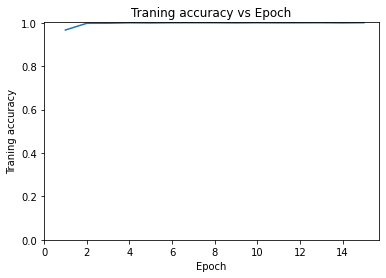

In [ ]:
#Training accuracy vs Epoch graph
import matplotlib.pyplot as plt
plt.plot(df_efficientnetb0['epoch'],df_efficientnetb0['accuracy'])
plt.title('Traning accuracy vs Epoch')
plt.ylabel('Traning accuracy')
plt.xlabel('Epoch')
plt.ylim(bottom=0)#starting y axis from 0
plt.xlim(left=0)#starting x axis from 0
plt.savefig('(15 Epoch)Traning accuracy vs Epoch(EfficientNetB0)',dpi=300); 
plt.show()

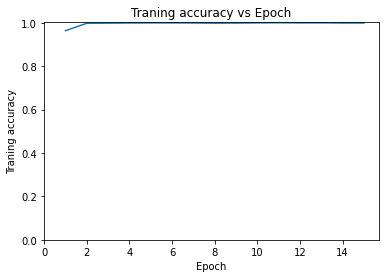

In [ ]:
#Training accuracy vs Epoch graph
import matplotlib.pyplot as plt
plt.plot(df_efficientnetb1['epoch'],df_efficientnetb1['accuracy'])
plt.title('Traning accuracy vs Epoch')
plt.ylabel('Traning accuracy')
plt.xlabel('Epoch')
plt.ylim(bottom=0)#starting y axis from 0
plt.xlim(left=0)#starting x axis from 0
plt.savefig('(15 Epoch)Traning accuracy vs Epoch(EfficientNetB1)',dpi=300); 
plt.show()

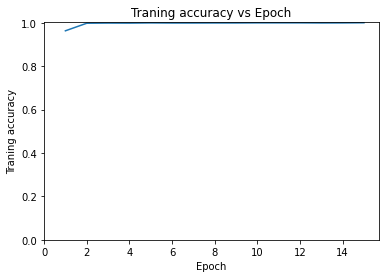

In [ ]:
#Training accuracy vs Epoch graph
import matplotlib.pyplot as plt
plt.plot(df_efficientnetb2['epoch'],df_efficientnetb2['accuracy'])
plt.title('Traning accuracy vs Epoch')
plt.ylabel('Traning accuracy')
plt.xlabel('Epoch')
plt.ylim(bottom=0)#starting y axis from 0
plt.xlim(left=0)#starting x axis from 0
plt.savefig('(15 Epoch)Traning accuracy vs Epoch(EfficientNetB2)',dpi=300); 
plt.show()

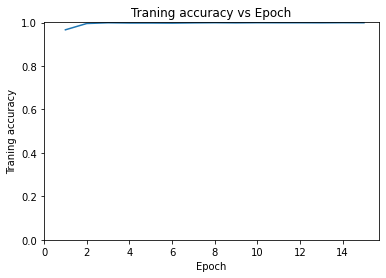

In [ ]:
#Training accuracy vs Epoch graph
import matplotlib.pyplot as plt
plt.plot(df_efficientnetb3['epoch'],df_efficientnetb3['accuracy'])
plt.title('Traning accuracy vs Epoch')
plt.ylabel('Traning accuracy')
plt.xlabel('Epoch')
plt.ylim(bottom=0)#starting y axis from 0
plt.xlim(left=0)#starting x axis from 0
plt.savefig('(15 Epoch)Traning accuracy vs Epoch(EfficientNetB3)',dpi=300); 
plt.show()

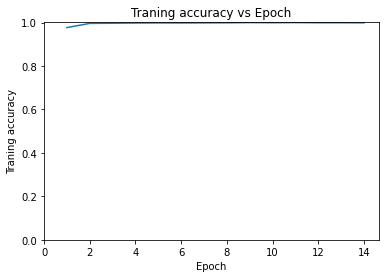

In [ ]:
#Training accuracy vs Epoch graph
import matplotlib.pyplot as plt
plt.plot(df_efficientnetb4['epoch'],df_efficientnetb4['accuracy'])
plt.title('Traning accuracy vs Epoch')
plt.ylabel('Traning accuracy')
plt.xlabel('Epoch')
plt.ylim(bottom=0)#starting y axis from 0
plt.xlim(left=0)#starting x axis from 0
plt.savefig('(15 Epoch)Traning accuracy vs Epoch(EfficientNetB4)',dpi=300); 
plt.show()

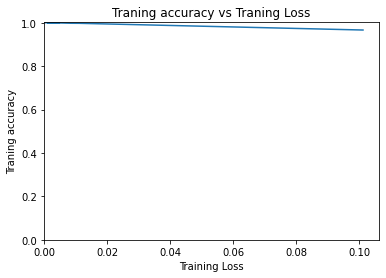

In [ ]:
#Traning accuracy vs Traning Loss graph
plt.plot(df_efficientnetb0['loss'],df_efficientnetb0['accuracy'])
plt.title('Traning accuracy vs Traning Loss')
plt.ylabel('Traning accuracy')
plt.xlabel('Training Loss')
plt.ylim(bottom=0)#starting y axis from 0
plt.xlim(left=0)#starting x axis from 0
plt.savefig('(15 Epoch)Traning accuracy vs Traning Loss(EfficientNetB0)',dpi=300); 
plt.show()

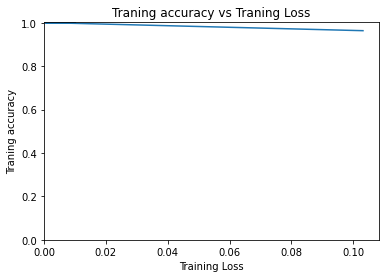

In [ ]:
#Traning accuracy vs Traning Loss graph
plt.plot(df_efficientnetb1['loss'],df_efficientnetb1['accuracy'])
plt.title('Traning accuracy vs Traning Loss')
plt.ylabel('Traning accuracy')
plt.xlabel('Training Loss')
plt.ylim(bottom=0)#starting y axis from 0
plt.xlim(left=0)#starting x axis from 0
plt.savefig('(15 Epoch)Traning accuracy vs Traning Loss(EfficientNetB1)',dpi=300); 
plt.show()

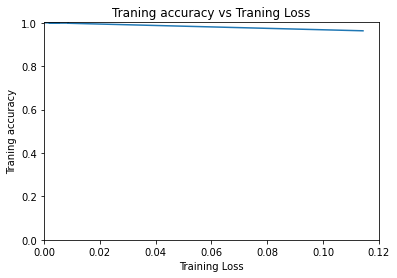

In [ ]:
#Traning accuracy vs Traning Loss graph
plt.plot(df_efficientnetb2['loss'],df_efficientnetb2['accuracy'])
plt.title('Traning accuracy vs Traning Loss')
plt.ylabel('Traning accuracy')
plt.xlabel('Training Loss')
plt.ylim(bottom=0)#starting y axis from 0
plt.xlim(left=0)#starting x axis from 0
plt.savefig('(15 Epoch)Traning accuracy vs Traning Loss(EfficientNetB2)',dpi=300); 
plt.show()

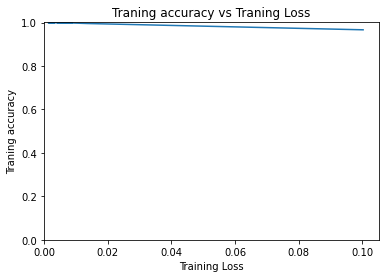

In [ ]:
#Traning accuracy vs Traning Loss graph
plt.plot(df_efficientnetb3['loss'],df_efficientnetb3['accuracy'])
plt.title('Traning accuracy vs Traning Loss')
plt.ylabel('Traning accuracy')
plt.xlabel('Training Loss')
plt.ylim(bottom=0)#starting y axis from 0
plt.xlim(left=0)#starting x axis from 0
plt.savefig('(15 Epoch)Traning accuracy vs Traning Loss(EfficientNetB3)',dpi=300); 
plt.show()

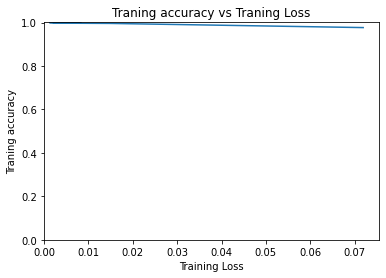

In [ ]:
#Traning accuracy vs Traning Loss graph
plt.plot(df_efficientnetb4['loss'],df_efficientnetb4['accuracy'])
plt.title('Traning accuracy vs Traning Loss')
plt.ylabel('Traning accuracy')
plt.xlabel('Training Loss')
plt.ylim(bottom=0)#starting y axis from 0
plt.xlim(left=0)#starting x axis from 0
plt.savefig('(15 Epoch)Traning accuracy vs Traning Loss(EfficientNetB4)',dpi=300); 
plt.show()

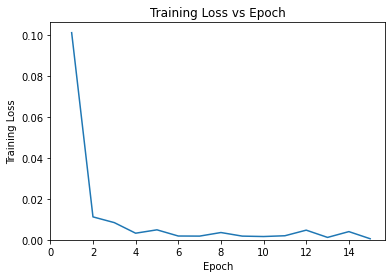

In [ ]:
#Training Loss vs Epoch graph
plt.plot(df_efficientnetb0['epoch'],df_efficientnetb0['loss'])
plt.title('Training Loss vs Epoch')
plt.ylabel('Training Loss')
plt.xlabel('Epoch')
plt.ylim(bottom=0)#starting y axis from 0
plt.xlim(left=0)#starting x axis from 0
plt.savefig('(15 Epoch)Training Loss vs Epoch(EfficientNetB0)',dpi=300); 
plt.show()

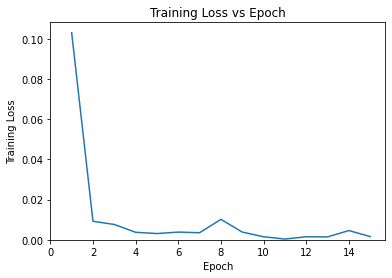

In [ ]:
#Training Loss vs Epoch graph
plt.plot(df_efficientnetb1['epoch'],df_efficientnetb1['loss'])
plt.title('Training Loss vs Epoch')
plt.ylabel('Training Loss')
plt.xlabel('Epoch')
plt.ylim(bottom=0)#starting y axis from 0
plt.xlim(left=0)#starting x axis from 0
plt.savefig('(15 Epoch)Training Loss vs Epoch(EfficientNetB1)',dpi=300); 
plt.show()

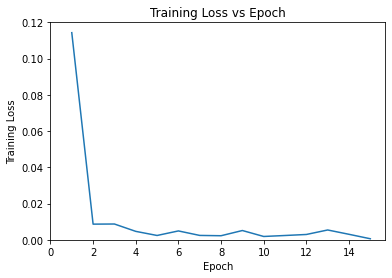

In [ ]:
#Training Loss vs Epoch graph
plt.plot(df_efficientnetb2['epoch'],df_efficientnetb2['loss'])
plt.title('Training Loss vs Epoch')
plt.ylabel('Training Loss')
plt.xlabel('Epoch')
plt.ylim(bottom=0)#starting y axis from 0
plt.xlim(left=0)#starting x axis from 0
plt.savefig('(15 Epoch)Training Loss vs Epoch(EfficientNetB2)',dpi=300); 
plt.show()

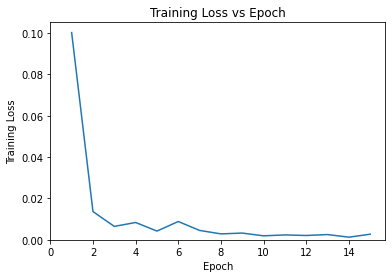

In [ ]:
#Training Loss vs Epoch graph
plt.plot(df_efficientnetb3['epoch'],df_efficientnetb3['loss'])
plt.title('Training Loss vs Epoch')
plt.ylabel('Training Loss')
plt.xlabel('Epoch')
plt.ylim(bottom=0)#starting y axis from 0
plt.xlim(left=0)#starting x axis from 0
plt.savefig('(15 Epoch)Training Loss vs Epoch(EfficientNetB3)',dpi=300); 
plt.show()

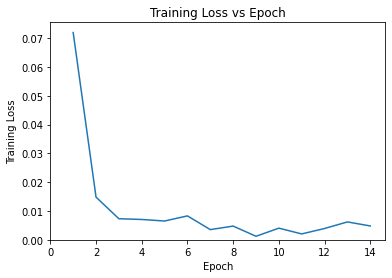

In [ ]:
#Training Loss vs Epoch graph
plt.plot(df_efficientnetb4['epoch'],df_efficientnetb4['loss'])
plt.title('Training Loss vs Epoch')
plt.ylabel('Training Loss')
plt.xlabel('Epoch')
plt.ylim(bottom=0)#starting y axis from 0
plt.xlim(left=0)#starting x axis from 0
plt.savefig('(15 Epoch)Training Loss vs Epoch(EfficientNetB4)',dpi=300); 
plt.show()

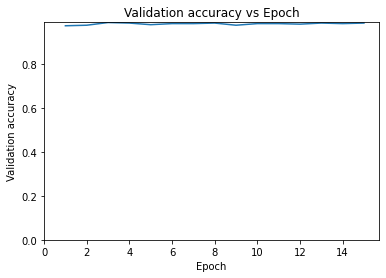

In [ ]:
#Validation accuracy vs Epoch graph
plt.plot(df_efficientnetb0['epoch'],df_efficientnetb0['val_accuracy'])
plt.title('Validation accuracy vs Epoch')
plt.ylabel('Validation accuracy')
plt.xlabel('Epoch')
plt.ylim(bottom=0)#starting y axis from 0
plt.xlim(left=0)#starting x axis from 0
plt.savefig('(15 Epoch)Validation accuracy vs Epoch(EfficientNetB0)',dpi=300); 
plt.show()

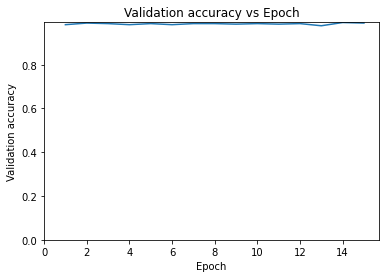

In [ ]:
#Validation accuracy vs Epoch graph
plt.plot(df_efficientnetb1['epoch'],df_efficientnetb1['val_accuracy'])
plt.title('Validation accuracy vs Epoch')
plt.ylabel('Validation accuracy')
plt.xlabel('Epoch')
plt.ylim(bottom=0)#starting y axis from 0
plt.xlim(left=0)#starting x axis from 0
plt.savefig('(15 Epoch)Validation accuracy vs Epoch(EfficientNetB1)',dpi=300); 
plt.show()

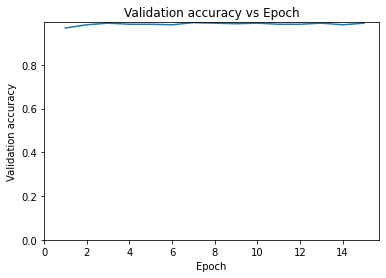

In [ ]:
#Validation accuracy vs Epoch graph
plt.plot(df_efficientnetb2['epoch'],df_efficientnetb2['val_accuracy'])
plt.title('Validation accuracy vs Epoch')
plt.ylabel('Validation accuracy')
plt.xlabel('Epoch')
plt.ylim(bottom=0)#starting y axis from 0
plt.xlim(left=0)#starting x axis from 0
plt.savefig('(15 Epoch)Validation accuracy vs Epoch(EfficientNetB2)',dpi=300); 
plt.show()

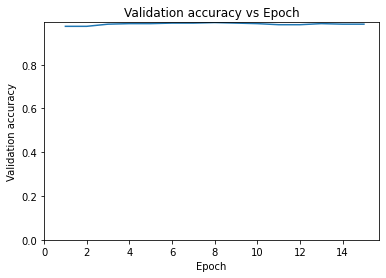

In [ ]:
#Validation accuracy vs Epoch graph
plt.plot(df_efficientnetb3['epoch'],df_efficientnetb3['val_accuracy'])
plt.title('Validation accuracy vs Epoch')
plt.ylabel('Validation accuracy')
plt.xlabel('Epoch')
plt.ylim(bottom=0)#starting y axis from 0
plt.xlim(left=0)#starting x axis from 0
plt.savefig('(15 Epoch)Validation accuracy vs Epoch(EfficientNetB3)',dpi=300); 
plt.show()

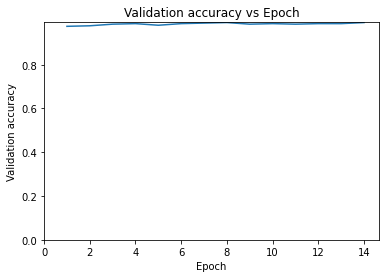

In [ ]:
#Validation accuracy vs Epoch graph
plt.plot(df_efficientnetb4['epoch'],df_efficientnetb4['val_accuracy'])
plt.title('Validation accuracy vs Epoch')
plt.ylabel('Validation accuracy')
plt.xlabel('Epoch')
plt.ylim(bottom=0)#starting y axis from 0
plt.xlim(left=0)#starting x axis from 0
plt.savefig('(15 Epoch)Validation accuracy vs Epoch(EfficientNetB4)',dpi=300); 
plt.show()

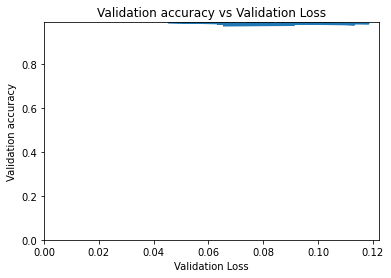

In [ ]:
#Validation accuracy vs Validation Loss graph
plt.plot(df_efficientnetb0['val_loss'],df_efficientnetb0['val_accuracy'])
plt.title('Validation accuracy vs Validation Loss')
plt.ylabel('Validation accuracy')
plt.xlabel('Validation Loss')
plt.ylim(bottom=0)#starting y axis from 0
plt.xlim(left=0)#starting x axis from 0
plt.savefig('(15 Epoch)Validation accuracy vs Validation Loss(EfficientNetB0)',dpi=300); 
plt.show()

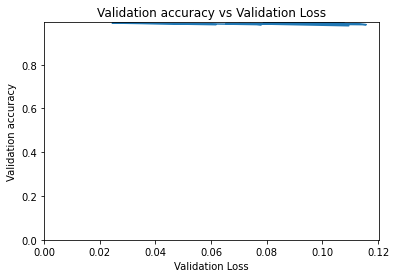

In [ ]:
#Validation accuracy vs Validation Loss graph
plt.plot(df_efficientnetb1['val_loss'],df_efficientnetb1['val_accuracy'])
plt.title('Validation accuracy vs Validation Loss')
plt.ylabel('Validation accuracy')
plt.xlabel('Validation Loss')
plt.ylim(bottom=0)#starting y axis from 0
plt.xlim(left=0)#starting x axis from 0
plt.savefig('(15 Epoch)Validation accuracy vs Validation Loss(EfficientNetB1)',dpi=300); 
plt.show()

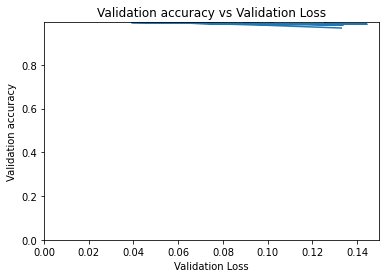

In [ ]:
#Validation accuracy vs Validation Loss graph
plt.plot(df_efficientnetb2['val_loss'],df_efficientnetb2['val_accuracy'])
plt.title('Validation accuracy vs Validation Loss')
plt.ylabel('Validation accuracy')
plt.xlabel('Validation Loss')
plt.ylim(bottom=0)#starting y axis from 0
plt.xlim(left=0)#starting x axis from 0
plt.savefig('(15 Epoch)Validation accuracy vs Validation Loss(EfficientNetB2)',dpi=300); 
plt.show()

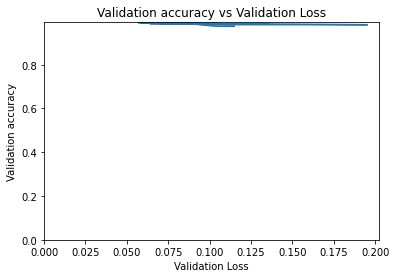

In [ ]:
#Validation accuracy vs Validation Loss graph
plt.plot(df_efficientnetb3['val_loss'],df_efficientnetb3['val_accuracy'])
plt.title('Validation accuracy vs Validation Loss')
plt.ylabel('Validation accuracy')
plt.xlabel('Validation Loss')
plt.ylim(bottom=0)#starting y axis from 0
plt.xlim(left=0)#starting x axis from 0
plt.savefig('(15 Epoch)Validation accuracy vs Validation Loss(EfficientNetB3)',dpi=300); 
plt.show()

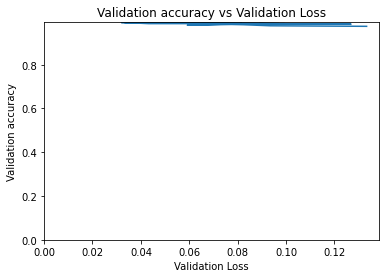

In [ ]:
#Validation accuracy vs Validation Loss graph
plt.plot(df_efficientnetb4['val_loss'],df_efficientnetb4['val_accuracy'])
plt.title('Validation accuracy vs Validation Loss')
plt.ylabel('Validation accuracy')
plt.xlabel('Validation Loss')
plt.ylim(bottom=0)#starting y axis from 0
plt.xlim(left=0)#starting x axis from 0
plt.savefig('(15 Epoch)Validation accuracy vs Validation Loss(EfficientNetB4)',dpi=300); 
plt.show()

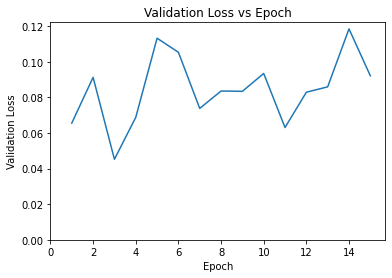

In [ ]:
#Validation Loss vs Epoch graph
plt.plot(df_efficientnetb0['epoch'],df_efficientnetb0['val_loss'])
plt.title('Validation Loss vs Epoch')
plt.ylabel('Validation Loss')
plt.xlabel('Epoch')
plt.ylim(bottom=0)#starting y axis from 0
plt.xlim(left=0)#starting x axis from 0
plt.savefig('(15 Epoch)Validation Loss vs Epoch(EfficientNetB0)',dpi=300); 
plt.show()

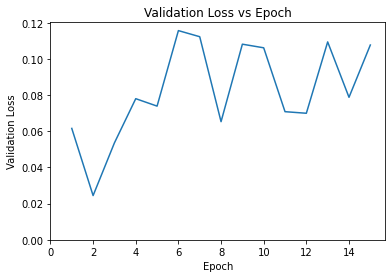

In [ ]:
#Validation Loss vs Epoch graph
plt.plot(df_efficientnetb1['epoch'],df_efficientnetb1['val_loss'])
plt.title('Validation Loss vs Epoch')
plt.ylabel('Validation Loss')
plt.xlabel('Epoch')
plt.ylim(bottom=0)#starting y axis from 0
plt.xlim(left=0)#starting x axis from 0
plt.savefig('(15 Epoch)Validation Loss vs Epoch(EfficientNetB1)',dpi=300); 
plt.show()

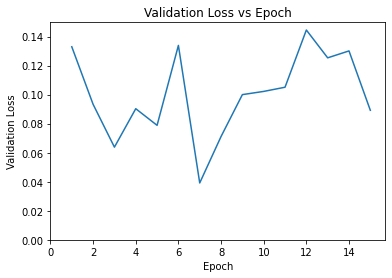

In [ ]:
#Validation Loss vs Epoch graph
plt.plot(df_efficientnetb2['epoch'],df_efficientnetb2['val_loss'])
plt.title('Validation Loss vs Epoch')
plt.ylabel('Validation Loss')
plt.xlabel('Epoch')
plt.ylim(bottom=0)#starting y axis from 0
plt.xlim(left=0)#starting x axis from 0
plt.savefig('(15 Epoch)Validation Loss vs Epoch(EfficientNetB2)',dpi=300); 
plt.show()

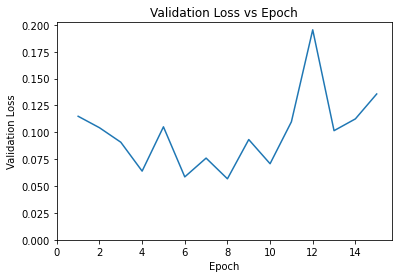

In [ ]:
#Validation Loss vs Epoch graph
plt.plot(df_efficientnetb3['epoch'],df_efficientnetb3['val_loss'])
plt.title('Validation Loss vs Epoch')
plt.ylabel('Validation Loss')
plt.xlabel('Epoch')
plt.ylim(bottom=0)#starting y axis from 0
plt.xlim(left=0)#starting x axis from 0
plt.savefig('(15 Epoch)Validation Loss vs Epoch(EfficientNetB3)',dpi=300); 
plt.show()

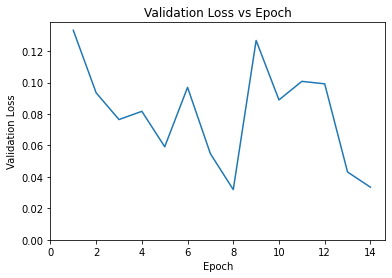

In [ ]:
#Validation Loss vs Epoch graph
plt.plot(df_efficientnetb4['epoch'],df_efficientnetb4['val_loss'])
plt.title('Validation Loss vs Epoch')
plt.ylabel('Validation Loss')
plt.xlabel('Epoch')
plt.ylim(bottom=0)#starting y axis from 0
plt.xlim(left=0)#starting x axis from 0
plt.savefig('(15 Epoch)Validation Loss vs Epoch(EfficientNetB4)',dpi=300); 
plt.show()

In [33]:
%ls

'(10 Epoch)EfficientNetB0-B4.ipynb'
'(10 Epoch)efficientnetb0-binary_classification.csv'
'(10 Epoch)efficientnetb0.h5'
'(10 Epoch)efficientnetb0-history.csv'
'(10 Epoch) EfficientNetB0 Multiclass ROC.png'
'(10 Epoch)efficientnetb0-roc_data.csv'
'(10 Epoch)EfficientNetB0 ROC(Micro averaged).png'
'(10 Epoch)efficientnetb1-binary_classification.csv'
'(10 Epoch)efficientnetb1.h5'
'(10 Epoch)efficientnetb1-history.csv'
'(10 Epoch) EfficientNetB1 Multiclass ROC.png'
'(10 Epoch)efficientnetb1-roc_data.csv'
'(10 Epoch)EfficientNetB1 ROC(Micro averaged).png'
'(10 Epoch)efficientnetb2-binary_classification.csv'
'(10 Epoch)efficientnetb2.h5'
'(10 Epoch)efficientnetb2-history.csv'
'(10 Epoch) EfficientNetB2 Multiclass ROC.png'
'(10 Epoch)efficientnetb2-roc_data.csv'
'(10 Epoch)EfficientNetB2 ROC(Micro averaged).png'
'(10 Epoch)efficientnetb3-binary_classification.csv'
'(10 Epoch)efficientnetb3.h5'
'(10 Epoch)efficientnetb3-history.csv'
'(10 Epoch) EfficientNetB3 Multiclass ROC.png'
'(10 Epoch)effi

In [34]:
%cd ..

/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels


In [35]:
%ls

'Colab Hardware Configuration.gdoc'   MobileNet/
'Dataset Smart Campus Guide'/         MobileNet_V2/
 DenseNet121/                        'NasNet Mobile'/
 EfficientNet/                        ResNet50/
'Implemented Results.docx'            VGG16/
 InceptionV3/                         Xception/


In [36]:
%cd Dataset Smart Campus Guide

/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/Dataset Smart Campus Guide


In [37]:
efficientnetb0=efficientnetb2

In [38]:
import imutils
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import imagenet_utils
import tensorflow as tf
import cv2

In [39]:
#Function to return time which will be useful for obtaining inference time
import time

def current_milli_time():
    return round(time.time() * 1000)

In [40]:
#path of 4 sample images from different direction for each class
image_path=["all/apple_lab_0.jpg","all/apple_lab_5.jpg","all/apple_lab_8.jpg","all/apple_lab_52.jpg","all/sophos_lab_0.jpg","all/sophos_lab_2.jpg","all/sophos_lab_132.jpg","all/sophos_lab_152.jpg","all/sophos_rack_1.jpg","all/sophos_rack_2.jpg","all/sophos_rack_29.jpg","all/sophos_rack_37.jpg","all/vr_lab_1.jpg","all/vr_lab_5.jpg","all/vr_lab_6.jpg","all/vr_lab_49.jpg"]

In [41]:
#model prediction for random image from  which was nither use for traning and validation
#random image containing dataset is used of 4 class: apple lab, sophos lab, sophos rack and vr lab
#time before prediction and after prediction of image is recorded for calculating inference time
  
resized=[]
label=[]
y_pred=[]
x=[]
y=[]
img=[]
for i in range(0,16):
  img.append(load_img(image_path[i],target_size=(224,224)));
  resized.append(img[i])
  img[i]=np.asarray(img[i])
  x.append(current_milli_time())
  y_pred.append(efficientnetb0.predict(img[i].reshape(1, 224, 224, 3)))
  y.append(current_milli_time())
  label.append(y_pred[i].argmax())
  if label[i]==0:
    temp="apple lab"
  elif label[i]==1:
    temp="sophos lab"
  elif label[i]==2:
    temp="sophos rack"
  else:
    temp="vr lab"
  label[i] = "{}: {:.2f}%".format(temp, y_pred[i][0][label[i]] * 100)

In [42]:
efficientnetb0.layers[-1].activation = None
class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        # store the model, the class index used to measure the class
        # activation map, and the layer to be used when visualizing
        # the class activation map
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName

        # if the layer name is None, attempt to automatically find
        # the target output layer
        if self.layerName is None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):
        # attempt to find the final convolutional layer in the network
        # by looping over the layers of the network in reverse order
        for layer in reversed(self.model.layers):
            # check to see if the layer has a 4D output
            if len(layer.output.shape) == 4:
                return layer.name

        # otherwise, we could not find a 4D layer so the GradCAM
        # algorithm cannot be applied
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")

    def compute_heatmap(self, image, eps=1e-8):
        # construct our gradient model by supplying (1) the inputs
        # to our pre-trained model, (2) the output of the (presumably)
        # final 4D layer in the network, and (3) the output of the
        # softmax activations from the model
        gradModel = Model(inputs=[self.model.inputs], outputs= [self.model.get_layer(self.layerName).output, self.model.output])

        # record operations for automatic differentiation
        with tf.GradientTape() as tape:
            # cast the image tensor to a float-32 data type, pass the
            # image through the gradient model, and grab the loss
            # associated with the specific class index
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            loss = predictions[:, self.classIdx]

        # use automatic differentiation to compute the gradients
        grads = tape.gradient(loss, convOutputs)

        # compute the guided gradients
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads

        # the convolution and guided gradients have a batch dimension
        # (which we don't need) so let's grab the volume itself and
        # discard the batch
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]

        # compute the average of the gradient values, and using them
        # as weights, compute the ponderation of the filters with
        # respect to the weights
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

        # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))

        # normalize the heatmap such that all values lie in the range
        # [0, 1], scale the resulting values to the range [0, 255],
        # and then convert to an unsigned 8-bit integer
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")

        # return the resulting heatmap to the calling function
        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5,
        colormap=cv2.COLORMAP_JET):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)

        # return a 2-tuple of the color mapped heatmap and the output,
        # overlaid image
        return (heatmap, output)

Our model says it is a : [[2.1994297e-12 1.1600304e-09 7.5731001e-12 1.0000000e+00]]
[INFO] vr lab: 100.00%


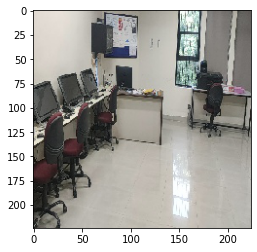

In [43]:
plt.imshow(img[12])
print("Our model says it is a :",y_pred[12])
print("[INFO] {}".format(label[12]))

In [44]:
#Inference time
y[12]-x[12]

46

In [45]:
# load the input image from disk (in Keras/TensorFlow format) and
# preprocess it
image = resized[12]
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = imagenet_utils.preprocess_input(image)

# use the network to make predictions on the input imag and find
# the class label index with the largest corresponding probability
preds = efficientnetb0.predict(image)
i = np.argmax(preds[0])

# initialize our gradient class activation map and build the heatmap
cam = GradCAM(efficientnetb0, i)
heatmap = cam.compute_heatmap(image)

# load the original image from disk (in OpenCV format) and then
# resize the image to its target dimensions
orig = cv2.imread(image_path[12])
resized_image = cv2.resize(orig, (224, 224))

# resize the resulting heatmap to the original input image dimensions
# and then overlay heatmap on top of the image

heatmap = cv2.resize(heatmap, (resized_image.shape[1], resized_image.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, resized_image, alpha=0.5)


In [46]:
%cd ..
%cd VGG16
%cd (10 Epoch)HeatMap visualization

/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/VGG16
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/VGG16/(10 Epoch)HeatMap visualization


In [47]:
%ls

'Apple lab'/  'Sophos lab'/  'Sophos rack'/  'VR lab'/


In [48]:
%cd VR lab

/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/VGG16/(10 Epoch)HeatMap visualization/VR lab


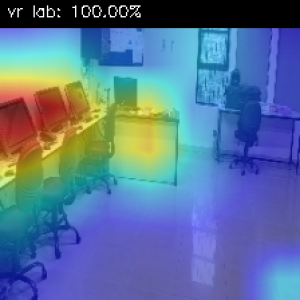

In [49]:
from google.colab.patches import cv2_imshow
# draw the predicted label on the output image
cv2.rectangle(output, (0, 0), (340, 20), (0, 0, 0), -1)
cv2.putText(output, label[12], (5, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 1)

# display the original image and resulting heatmap and output image
# to our screen
output = np.vstack([output])
output = imutils.resize(output, height=300)
cv2_imshow(output)
#save the image
cv2.imwrite("1.png",output)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [50]:
%cd ..
%cd ..
%cd ..
%cd Dataset Smart Campus Guide

/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/VGG16/(10 Epoch)HeatMap visualization
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/VGG16
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/Dataset Smart Campus Guide


Our model says it is a : [[3.9126449e-12 3.8810561e-12 7.7632356e-17 1.0000000e+00]]
[INFO] vr lab: 100.00%


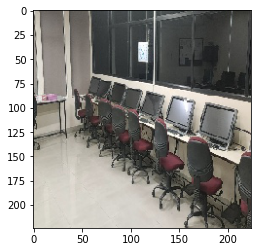

In [51]:
plt.imshow(img[13])
print("Our model says it is a :",y_pred[13])
print("[INFO] {}".format(label[13]))

In [52]:
#Inference time
y[13]-x[13]

48

In [53]:
# load the input image from disk (in Keras/TensorFlow format) and
# preprocess it
image = resized[13]
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = imagenet_utils.preprocess_input(image)

# use the network to make predictions on the input imag and find
# the class label index with the largest corresponding probability
preds = efficientnetb0.predict(image)
i = np.argmax(preds[0])

# initialize our gradient class activation map and build the heatmap
cam = GradCAM(efficientnetb0, i)
heatmap = cam.compute_heatmap(image)

# load the original image from disk (in OpenCV format) and then
# resize the image to its target dimensions
orig = cv2.imread(image_path[13])
resized_image = cv2.resize(orig, (224, 224))

# resize the resulting heatmap to the original input image dimensions
# and then overlay heatmap on top of the image
heatmap = cv2.resize(heatmap, (resized_image.shape[1], resized_image.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, resized_image, alpha=0.5)

In [54]:
%cd ..
%cd VGG16
%cd (10 Epoch)HeatMap visualization
%cd VR lab

/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/VGG16
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/VGG16/(10 Epoch)HeatMap visualization
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/VGG16/(10 Epoch)HeatMap visualization/VR lab


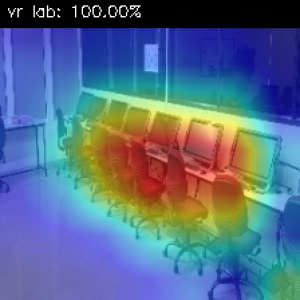

In [55]:
from google.colab.patches import cv2_imshow
# draw the predicted label on the output image
cv2.rectangle(output, (0, 0), (340, 20), (0, 0, 0), -1)
cv2.putText(output, label[13], (5, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 1)

# display the original image and resulting heatmap and output image
# to our screen
output = np.vstack([output])
output = imutils.resize(output, height=300)
cv2_imshow(output)
cv2.imwrite("2.png",output)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [56]:
%cd ..
%cd ..
%cd ..
%cd Dataset Smart Campus Guide

/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/VGG16/(10 Epoch)HeatMap visualization
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/VGG16
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/Dataset Smart Campus Guide


Our model says it is a : [[2.2786797e-09 2.5443368e-08 8.4220136e-13 1.0000000e+00]]
[INFO] vr lab: 100.00%


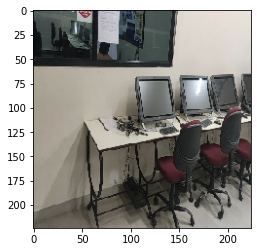

In [57]:
plt.imshow(img[14])
print("Our model says it is a :",y_pred[14])
print("[INFO] {}".format(label[14]))

In [58]:
#Inference time
y[14]-x[14]

52

In [59]:
# load the input image from disk (in Keras/TensorFlow format) and
# preprocess it
image = resized[14]
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = imagenet_utils.preprocess_input(image)

# use the network to make predictions on the input imag and find
# the class label index with the largest corresponding probability
preds = efficientnetb0.predict(image)
i = np.argmax(preds[0])

# initialize our gradient class activation map and build the heatmap
cam = GradCAM(efficientnetb0, i)
heatmap = cam.compute_heatmap(image)

# load the original image from disk (in OpenCV format) and then
# resize the image to its target dimensions
orig = cv2.imread(image_path[14])
resized_image = cv2.resize(orig, (224, 224))

# resize the resulting heatmap to the original input image dimensions
# and then overlay heatmap on top of the image
heatmap = cv2.resize(heatmap, (resized_image.shape[1], resized_image.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, resized_image, alpha=0.5)

In [60]:
%cd ..
%cd VGG16
%cd (10 Epoch)HeatMap visualization
%cd VR lab

/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/VGG16
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/VGG16/(10 Epoch)HeatMap visualization
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/VGG16/(10 Epoch)HeatMap visualization/VR lab


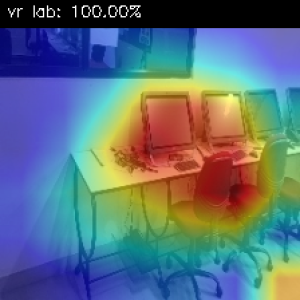

In [61]:
from google.colab.patches import cv2_imshow
# draw the predicted label on the output image
cv2.rectangle(output, (0, 0), (340, 20), (0, 0, 0), -1)
cv2.putText(output, label[14], (5, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 1)

# display the original image and resulting heatmap and output image
# to our screen
output = np.vstack([output])
output = imutils.resize(output, height=300)
cv2_imshow(output)
cv2.imwrite("3.png",output)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [62]:
%cd ..
%cd ..
%cd ..
%cd Dataset Smart Campus Guide

/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/VGG16/(10 Epoch)HeatMap visualization
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/VGG16
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/Dataset Smart Campus Guide


Our model says it is a : [[4.7432733e-09 1.3823106e-07 4.7376109e-10 9.9999988e-01]]
[INFO] vr lab: 100.00%


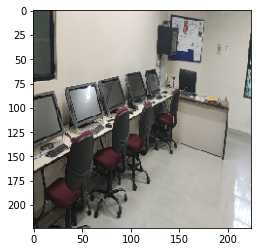

In [63]:
plt.imshow(img[15])
print("Our model says it is a :",y_pred[15])
print("[INFO] {}".format(label[15]))

In [64]:
#Inference time
y[15]-x[15]

47

In [65]:
# load the input image from disk (in Keras/TensorFlow format) and
# preprocess it
image = resized[15]
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = imagenet_utils.preprocess_input(image)

# use the network to make predictions on the input imag and find
# the class label index with the largest corresponding probability
preds = efficientnetb0.predict(image)
i = np.argmax(preds[0])

# initialize our gradient class activation map and build the heatmap
cam = GradCAM(efficientnetb0, i)
heatmap = cam.compute_heatmap(image)

# load the original image from disk (in OpenCV format) and then
# resize the image to its target dimensions
orig = cv2.imread(image_path[15])
resized_image = cv2.resize(orig, (224, 224))

# resize the resulting heatmap to the original input image dimensions
# and then overlay heatmap on top of the image
heatmap = cv2.resize(heatmap, (resized_image.shape[1], resized_image.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, resized_image, alpha=0.5)

In [66]:
%cd ..
%cd VGG16
%cd (10 Epoch)HeatMap visualization
%cd VR lab

/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/VGG16
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/VGG16/(10 Epoch)HeatMap visualization
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/VGG16/(10 Epoch)HeatMap visualization/VR lab


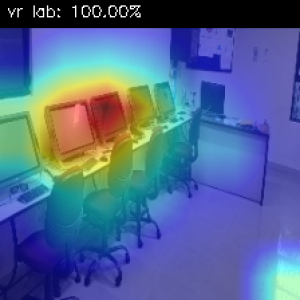

In [67]:
from google.colab.patches import cv2_imshow
# draw the predicted label on the output image
cv2.rectangle(output, (0, 0), (340, 20), (0, 0, 0), -1)
cv2.putText(output, label[15], (5, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 1)

# display the original image and resulting heatmap and output image
# to our screen
output = np.vstack([output])
output = imutils.resize(output, height=300)
cv2_imshow(output)
cv2.imwrite("4.png",output)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [68]:
%cd ..
%cd ..
%cd ..
%cd Dataset Smart Campus Guide

/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/VGG16/(10 Epoch)HeatMap visualization
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/VGG16
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels
/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/Dataset Smart Campus Guide


In [ ]:
#image prediction on train dataset images and storing it in array containing result of prediction done by model 
#class 0: apple lab
#class 1: sophos lab
#class 2: sophos rack
#class 3: apple lab

import os

x_train0=[]#contains images after applying argmax on one hot encoded representation  which will have class predicted for all train dataset images
x_train1=[]
x_train2=[]
x_train3=[]
x_train4=[]

#apple lab image prediction code
sub_path=train_path+"/apple_lab"
for img in os.listdir(sub_path):

    image_path=sub_path+"/"+img

    img_arr=load_img(image_path,target_size=(224,224));
    print(image_path)
    img_arr=np.asarray(img_arr)

    y_pred=efficientnetb0.predict(img_arr.reshape(1,224,224,3))
    y_pred=np.argmax(y_pred,axis=1)
    print(y_pred)
    x_train0.extend(y_pred)

    y_pred=efficientnetb1.predict(img_arr.reshape(1,224,224,3))
    y_pred=np.argmax(y_pred,axis=1)
    print(y_pred)
    x_train1.extend(y_pred)

    y_pred=efficientnetb2.predict(img_arr.reshape(1,224,224,3))
    y_pred=np.argmax(y_pred,axis=1)
    print(y_pred)
    x_train2.extend(y_pred)

    y_pred=efficientnetb3.predict(img_arr.reshape(1,224,224,3))
    y_pred=np.argmax(y_pred,axis=1)
    print(y_pred)
    x_train3.extend(y_pred)

    y_pred=efficientnetb4.predict(img_arr.reshape(1,224,224,3))
    y_pred=np.argmax(y_pred,axis=1)
    print(y_pred)
    x_train4.extend(y_pred)


#sophos lab image prediction code 
sub_path=train_path+"/sophos_lab"
for img in os.listdir(sub_path):

    image_path=sub_path+"/"+img

    # img_arr=cv2.imread(image_path)
    img_arr=load_img(image_path,target_size=(224,224));
    print(image_path)
    img_arr=np.asarray(img_arr)

    # img_arr=cv2.resize(img_arr,(224,224))
    y_pred=efficientnetb0.predict(img_arr.reshape(1,224,224,3))
    y_pred=np.argmax(y_pred,axis=1)
    print(y_pred)
    x_train0.extend(y_pred)

    y_pred=efficientnetb1.predict(img_arr.reshape(1,224,224,3))
    y_pred=np.argmax(y_pred,axis=1)
    print(y_pred)
    x_train1.extend(y_pred)

    y_pred=efficientnetb2.predict(img_arr.reshape(1,224,224,3))
    y_pred=np.argmax(y_pred,axis=1)
    print(y_pred)
    x_train2.extend(y_pred)

    y_pred=efficientnetb3.predict(img_arr.reshape(1,224,224,3))
    y_pred=np.argmax(y_pred,axis=1)
    print(y_pred)
    x_train3.extend(y_pred)

    y_pred=efficientnetb4.predict(img_arr.reshape(1,224,224,3))
    y_pred=np.argmax(y_pred,axis=1)
    print(y_pred)
    x_train4.extend(y_pred)



#sophos rack image prediction code
sub_path=train_path+"/sophos_rack"
for img in os.listdir(sub_path):

    image_path=sub_path+"/"+img

    img_arr=load_img(image_path,target_size=(224,224));
    print(image_path)
    img_arr=np.asarray(img_arr)

    y_pred=efficientnetb0.predict(img_arr.reshape(1,224,224,3))
    y_pred=np.argmax(y_pred,axis=1)
    print(y_pred)
    x_train0.extend(y_pred)

    y_pred=efficientnetb1.predict(img_arr.reshape(1,224,224,3))
    y_pred=np.argmax(y_pred,axis=1)
    print(y_pred)
    x_train1.extend(y_pred)

    y_pred=efficientnetb2.predict(img_arr.reshape(1,224,224,3))
    y_pred=np.argmax(y_pred,axis=1)
    print(y_pred)
    x_train2.extend(y_pred)

    y_pred=efficientnetb3.predict(img_arr.reshape(1,224,224,3))
    y_pred=np.argmax(y_pred,axis=1)
    print(y_pred)
    x_train3.extend(y_pred)

    y_pred=efficientnetb4.predict(img_arr.reshape(1,224,224,3))
    y_pred=np.argmax(y_pred,axis=1)
    print(y_pred)
    x_train4.extend(y_pred)



#vr lab image prediction code
sub_path=train_path+"/vr_lab"
for img in os.listdir(sub_path):

    image_path=sub_path+"/"+img

    img_arr=load_img(image_path,target_size=(224,224));
    print(image_path)
    img_arr=np.asarray(img_arr)

    y_pred=efficientnetb0.predict(img_arr.reshape(1,224,224,3))
    y_pred=np.argmax(y_pred,axis=1)
    print(y_pred)
    x_train0.extend(y_pred)

    
    y_pred=efficientnetb1.predict(img_arr.reshape(1,224,224,3))
    y_pred=np.argmax(y_pred,axis=1)
    print(y_pred)
    x_train1.extend(y_pred)

    
    y_pred=efficientnetb2.predict(img_arr.reshape(1,224,224,3))
    y_pred=np.argmax(y_pred,axis=1)
    print(y_pred)
    x_train2.extend(y_pred)

    
    y_pred=efficientnetb3.predict(img_arr.reshape(1,224,224,3))
    y_pred=np.argmax(y_pred,axis=1)
    print(y_pred)
    x_train3.extend(y_pred)

    
    y_pred=efficientnetb4.predict(img_arr.reshape(1,224,224,3))
    y_pred=np.argmax(y_pred,axis=1)
    print(y_pred)
    x_train4.extend(y_pred)

In [ ]:
#image prediction on unlabled dataset images and storing it in array containing result of prediction done by model 
x_test0=[]#contains images after applying argmax on one hot encoded representation  which will have class predicted for all train dataset images
x_test1=[]
x_test2=[]
x_test3=[]
x_test4=[]


#apple lab image prediction code
sub_path= "all"
path=[]
for img in os.listdir(sub_path):

    image_path=sub_path+"/"+img
    path.append(image_path)
path.sort()
for img in path:
    img_arr=load_img(img,target_size=(224,224));
    img_arr=np.asarray(img_arr)

    y_pred=efficientnetb0.predict(img_arr.reshape(1,224,224,3))
    y_pred=np.argmax(y_pred,axis=1)
    print(img)
    print(y_pred)
    x_test0.extend(y_pred)

    y_pred=efficientnetb1.predict(img_arr.reshape(1,224,224,3))
    y_pred=np.argmax(y_pred,axis=1)
    print(img)
    print(y_pred)
    x_test1.extend(y_pred)

    y_pred=efficientnetb2.predict(img_arr.reshape(1,224,224,3))
    y_pred=np.argmax(y_pred,axis=1)
    print(img)
    print(y_pred)
    x_test2.extend(y_pred)

    y_pred=efficientnetb3.predict(img_arr.reshape(1,224,224,3))
    y_pred=np.argmax(y_pred,axis=1)
    print(img)
    print(y_pred)
    x_test3.extend(y_pred)

    y_pred=efficientnetb4.predict(img_arr.reshape(1,224,224,3))
    y_pred=np.argmax(y_pred,axis=1)
    print(img)
    print(y_pred)
    x_test4.extend(y_pred)

all/apple_lab_0.jpg
[0]
all/apple_lab_0.jpg
[0]
all/apple_lab_0.jpg
[0]
all/apple_lab_0.jpg
[0]
all/apple_lab_0.jpg
[0]
all/apple_lab_1.jpg
[0]
all/apple_lab_1.jpg
[0]
all/apple_lab_1.jpg
[0]
all/apple_lab_1.jpg
[0]
all/apple_lab_1.jpg
[0]
all/apple_lab_10.jpg
[0]
all/apple_lab_10.jpg
[0]
all/apple_lab_10.jpg
[0]
all/apple_lab_10.jpg
[0]
all/apple_lab_10.jpg
[0]
all/apple_lab_100.jpg
[0]
all/apple_lab_100.jpg
[0]
all/apple_lab_100.jpg
[0]
all/apple_lab_100.jpg
[0]
all/apple_lab_100.jpg
[0]
all/apple_lab_101.jpg
[0]
all/apple_lab_101.jpg
[0]
all/apple_lab_101.jpg
[0]
all/apple_lab_101.jpg
[0]
all/apple_lab_101.jpg
[0]
all/apple_lab_102.jpg
[0]
all/apple_lab_102.jpg
[0]
all/apple_lab_102.jpg
[0]
all/apple_lab_102.jpg
[0]
all/apple_lab_102.jpg
[0]
all/apple_lab_103.jpg
[0]
all/apple_lab_103.jpg
[0]
all/apple_lab_103.jpg
[0]
all/apple_lab_103.jpg
[0]
all/apple_lab_103.jpg
[0]
all/apple_lab_104.jpg
[0]
all/apple_lab_104.jpg
[0]
all/apple_lab_104.jpg
[0]
all/apple_lab_104.jpg
[0]
all/apple_l

In [ ]:
#storing actual classes in array for all train dataset images
train_y=train_set.classes
train_y

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

In [ ]:
import pandas as pd
df=pd.read_csv("test.csv")

In [ ]:
df

,labels
0,0
1,0
2,0
3,0
4,0
...,...
398,3
399,3
400,3
401,3


In [ ]:
test_y=df['labels']

In [ ]:
#classification report and confusion matrix made using predicted image class and acutal image class(on both training and testing dataset)

import numpy as np
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import tensorflow
print("For Training(EfficientNetB0)")
#get classification report
print(classification_report(x_train0,train_y))
#get confusion matrix
print(confusion_matrix(x_train0,train_y))
print("")
print("For Testing(EfficientNetB0)")
#get classification report
print(classification_report(x_test0,test_y))
#get confusion matrix
print(confusion_matrix(x_test0,test_y))

print("For Training(EfficientNetB1)")
#get classification report
print(classification_report(x_train1,train_y))
#get confusion matrix
print(confusion_matrix(x_train1,train_y))
print("")
print("For Testing(EfficientNetB1)")
#get classification report
print(classification_report(x_test1,test_y))
#get confusion matrix
print(confusion_matrix(x_test1,test_y))

print("For Training(EfficientNetB2)")
#get classification report
print(classification_report(x_train2,train_y))
#get confusion matrix
print(confusion_matrix(x_train2,train_y))
print("")
print("For Testing(EfficientNetB2)")
#get classification report
print(classification_report(x_test2,test_y))
#get confusion matrix
print(confusion_matrix(x_test2,test_y))

print("For Training(EfficientNetB3)")
#get classification report
print(classification_report(x_train3,train_y))
#get confusion matrix
print(confusion_matrix(x_train3,train_y))
print("")
print("For Testing(EfficientNetB3)")
#get classification report
print(classification_report(x_test3,test_y))
#get confusion matrix
print(confusion_matrix(x_test3,test_y))

print("For Training(EfficientNetB4)")
#get classification report
print(classification_report(x_train4,train_y))
#get confusion matrix
print(confusion_matrix(x_train4,train_y))
print("")
print("For Testing(EfficientNetB4)")
#get classification report
print(classification_report(x_test4,test_y))
#get confusion matrix
print(confusion_matrix(x_test4,test_y))

For Training(EfficientNetB0)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       853
           1       1.00      1.00      1.00      1984
           2       1.00      1.00      1.00       431
           3       1.00      1.00      1.00       838

    accuracy                           1.00      4106
   macro avg       1.00      1.00      1.00      4106
weighted avg       1.00      1.00      1.00      4106

[[ 853    0    0    0]
 [   0 1983    1    0]
 [   0    0  431    0]
 [   0    0    0  838]]

For Testing(EfficientNetB0)
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       145
           1       0.99      0.99      0.99       169
           2       1.00      0.97      0.99        39
           3       1.00      1.00      1.00        50

    accuracy                           1.00       403
   macro avg       1.00      0.99      0.99       403
weighted avg       1.00      1.00 

In [ ]:
#accuracy score for training datset
print("Training(EfficienNetB0)")
accuracy_score(x_train0,train_y)

Training(EfficienNetB0)


0.9997564539698003

In [ ]:
print("Training(EfficienNetB1)")
accuracy_score(x_train1,train_y)

Training(EfficienNetB1)


0.9997564539698003

In [ ]:
print("Training(EfficienNetB2)")
accuracy_score(x_train2,train_y)

Training(EfficienNetB2)


0.9997564539698003

In [ ]:
print("Training(EfficienNetB3)")
accuracy_score(x_train3,train_y)

Training(EfficienNetB3)


1.0

In [ ]:
print("Training(EfficienNetB4)")
accuracy_score(x_train4,train_y)

Training(EfficienNetB4)


1.0

In [ ]:
#accuracy score for testing datset
print("Testing(EfficienNetB0)")
accuracy_score(x_test0, test_y)

Testing(EfficienNetB0)


0.9950372208436724

In [ ]:
print("Testing(EfficienNetB1)")
accuracy_score(x_test1, test_y)

Testing(EfficienNetB1)


0.9925558312655087

In [ ]:
print("Testing(EfficienNetB2)")
accuracy_score(x_test2, test_y)

Testing(EfficienNetB2)


0.9950372208436724

In [ ]:
print("Testing(EfficienNetB3)")
accuracy_score(x_test3, test_y)

Testing(EfficienNetB3)


0.9950372208436724

In [ ]:
print("Testing(EfficienNetB4)")
accuracy_score(x_test4, test_y)

Testing(EfficienNetB4)


0.9925558312655087

In [ ]:
#macro averaged F1 score
from sklearn.metrics import f1_score

print("(EfficienNetB0)")
f1_score(x_test0,test_y,average='macro')

(EfficienNetB0)


0.9944148502832086

In [ ]:
print("(EfficienNetB1)")
f1_score(x_test1,test_y,average='macro')

(EfficienNetB1)


0.9888756900948419

In [ ]:
print("(EfficienNetB2)")
f1_score(x_test2,test_y,average='macro')

(EfficienNetB2)


0.9921016483516484

In [ ]:
print("(EfficienNetB3)")
f1_score(x_test3,test_y,average='macro')

(EfficienNetB3)


0.9921016483516484

In [ ]:
print("(EfficienNetB4)")
f1_score(x_test4,test_y,average='macro')

(EfficienNetB4)


0.9887672942976863

In [ ]:
#macro averaged recall score
from sklearn.metrics import recall_score

print("(EfficienNetB0)")
recall_score(x_test0,df['labels'],average='macro')

(EfficienNetB0)


0.9921104536489151

In [ ]:
print("(EfficienNetB1)")
recall_score(x_test1,df['labels'],average='macro')

(EfficienNetB1)


0.9825980392156863

In [ ]:
print("(EfficienNetB2)")
recall_score(x_test2,df['labels'],average='macro')

(EfficienNetB2)


0.9875

In [ ]:
print("(EfficienNetB3)")
recall_score(x_test3,df['labels'],average='macro')

(EfficienNetB3)


0.9875

In [ ]:
print("(EfficienNetB4)")
recall_score(x_test4,df['labels'],average='macro')

(EfficienNetB4)


0.9825980392156863

In [ ]:
#macro averaged precision score
from sklearn.metrics import precision_score

print("(EfficienNetB0)")
precision_score(x_test0, test_y,average='macro')

(EfficienNetB0)


0.9968083812920483

In [ ]:
print("(EfficienNetB1)")
precision_score(x_test1, test_y,average='macro')

(EfficienNetB1)


0.9955621301775148

In [ ]:
print("(EfficienNetB2)")
precision_score(x_test2, test_y,average='macro')

(EfficienNetB2)


0.9970414201183432

In [ ]:
print("(EfficienNetB3)")
precision_score(x_test3, test_y,average='macro')

(EfficienNetB3)


0.9970414201183432

In [ ]:
print("(EfficienNetB4)")
precision_score(x_test4, test_y,average='macro')

(EfficienNetB4)


0.9953290913512199

In [ ]:
%ls

all/  Logs/  test/  test.csv  train/


In [ ]:
%cd ..

/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels


In [ ]:
%ls

'Colab Hardware Configuration.gdoc'   MobileNet/
'Dataset Smart Campus Guide'/         MobileNet_V2/
 DenseNet121/                        'NasNet Mobile'/
 EfficientNet/                        ResNet50/
'Implemented Results.docx'            VGG16/
 InceptionV3/                         Xception/


In [ ]:
%cd EfficientNet

/gdrive/.shortcut-targets-by-id/1h04iLSyUCJmjzqWBtL_wXqxSoD5HwcLg/AllModels/EfficientNet


In [ ]:
#function which will return number of flops for a model 
import tensorflow as tf

def get_flops(model_h5_path):
    session = tf.compat.v1.Session()
    graph = tf.compat.v1.get_default_graph()
        

    with graph.as_default():
        with session.as_default():
            model = tf.keras.models.load_model(model_h5_path)

            run_meta = tf.compat.v1.RunMetadata()
            opts = tf.compat.v1.profiler.ProfileOptionBuilder.float_operation()
        
            # We use the Keras session graph in the call to the profiler.
            flops = tf.compat.v1.profiler.profile(graph=graph,
                                                  run_meta=run_meta, cmd='op', options=opts)
        
            return flops.total_float_ops

In [ ]:
#find and display number of flops in classfication model 
tf.compat.v1.reset_default_graph()

print("(EfficienNetB0)")
print(get_flops('(15 Epoch)efficientnetb0.h5'))

print("(EfficienNetB1)")
print(get_flops('(15 Epoch)efficientnetb1.h5'))

print("(EfficienNetB2)")
print(get_flops('(15 Epoch)efficientnetb2.h5'))

print("(EfficienNetB3)")
print(get_flops('(15 Epoch)efficientnetb3.h5'))

print("(EfficienNetB4)")
print(get_flops('(15 Epoch)efficientnetb4.h5'))

(EfficienNetB0)
Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`
4207080
(EfficienNetB1)
10894944
(EfficienNetB2)
18788936
(EfficienNetB3)
29678856
(EfficienNetB4)
47424472


In [ ]:
#here binary classification is done that is wether image belongs to class 0(apple lab) or not
#converting predicted class 0 to 1 and rest to 0 and storing it in x_test1 list
#converting actual class 0 to 1 and rest to 0 and storing it in test_y1 list
x_test1_efficientnetb0 = [x for x in x_test0]
for i in range (len(x_test0)):
  if(x_test0[i]==0):
    x_test1_efficientnetb0[i]=1
  else:
    x_test1_efficientnetb0[i]=0

x_test1_efficientnetb1 = [x for x in x_test1]
for i in range (len(x_test1)):
  if(x_test1[i]==0):
    x_test1_efficientnetb1[i]=1
  else:
    x_test1_efficientnetb1[i]=0

x_test1_efficientnetb2 = [x for x in x_test2]
for i in range (len(x_test2)):
  if(x_test2[i]==0):
    x_test1_efficientnetb2[i]=1
  else:
    x_test1_efficientnetb2[i]=0

x_test1_efficientnetb3 = [x for x in x_test3]
for i in range (len(x_test3)):
  if(x_test3[i]==0):
    x_test1_efficientnetb3[i]=1
  else:
    x_test1_efficientnetb3[i]=0  

x_test1_efficientnetb4 = [x for x in x_test4]
for i in range (len(x_test4)):
  if(x_test4[i]==0):
    x_test1_efficientnetb4[i]=1
  else:
    x_test1_efficientnetb4[i]=0  

test_y1 = [x for x in test_y]
for i in range (len(test_y)):
  if(test_y[i]==0):
    test_y1[i]=1
  else:
    test_y1[i]=0

In [ ]:
#predicted binary classification where it belong to class 0(apple lab) or not
#array contains 1 where class 0(apple lab) is predicted and rest as 0
test_y1

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
#actual binary lable whether it belongs to class 0 or not
#array contains 1 where class 0(apple lab) is actual for that perticular image and rest as 0
x_test1

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
#here binary classification is done that is wether image belongs to class 1(sophos lab) or not
#converting predicted class 1 to 1 and rest to 0 and storing it in x_test2 list
#converting actual class 1 to 1 and rest to 0 and storing it in test_y2 list
x_test2_efficientnetb0 = [x for x in x_test0]
for i in range (len(x_test0)):
  if(x_test0[i]==1):
    x_test2_efficientnetb0[i]=1
  else:
    x_test2_efficientnetb0[i]=0

x_test2_efficientnetb1 = [x for x in x_test1]
for i in range (len(x_test1)):
  if(x_test2[i]==1):
    x_test2_efficientnetb1[i]=1
  else:
    x_test2_efficientnetb1[i]=0

x_test2_efficientnetb2 = [x for x in x_test2]
for i in range (len(x_test2)):
  if(x_test2[i]==1):
    x_test2_efficientnetb2[i]=1
  else:
    x_test2_efficientnetb2[i]=0

x_test2_efficientnetb3 = [x for x in x_test3]
for i in range (len(x_test3)):
  if(x_test3[i]==1):
    x_test2_efficientnetb3[i]=1
  else:
    x_test2_efficientnetb3[i]=0  

x_test2_efficientnetb4 = [x for x in x_test4]
for i in range (len(x_test4)):
  if(x_test4[i]==1):
    x_test2_efficientnetb4[i]=1
  else:
    x_test2_efficientnetb4[i]=0  

test_y2 = [x for x in test_y]
for i in range (len(test_y)):
  if(test_y[i]==1):
    test_y2[i]=1
  else:
    test_y2[i]=0

In [ ]:
#here binary classification is done that is wether image belongs to class 2(sophos rack) or not
#converting predicted class 2 to 1 and rest to 0 and storing it in x_test3 list
#converting actual class 2 to 1 and rest to 0 and storing it in test_y3 list
x_test3_efficientnetb0 = [x for x in x_test0]
for i in range (len(x_test0)):
  if(x_test0[i]==2):
    x_test3_efficientnetb0[i]=1
  else:
    x_test3_efficientnetb0[i]=0

x_test3_efficientnetb1 = [x for x in x_test1]
for i in range (len(x_test1)):
  if(x_test1[i]==2):
    x_test3_efficientnetb1[i]=1
  else:
    x_test3_efficientnetb1[i]=0

x_test3_efficientnetb2 = [x for x in x_test2]
for i in range (len(x_test2)):
  if(x_test2[i]==2):
    x_test3_efficientnetb2[i]=1
  else:
    x_test3_efficientnetb2[i]=0

x_test3_efficientnetb3 = [x for x in x_test3]
for i in range (len(x_test3)):
  if(x_test3[i]==2):
    x_test3_efficientnetb3[i]=1
  else:
    x_test3_efficientnetb3[i]=0  

x_test3_efficientnetb4 = [x for x in x_test4]
for i in range (len(x_test4)):
  if(x_test4[i]==2):
    x_test3_efficientnetb4[i]=1
  else:
    x_test3_efficientnetb4[i]=0  

test_y3 = [x for x in test_y]
for i in range (len(test_y)):
  if(test_y[i]==2):
    test_y3[i]=1
  else:
    test_y3[i]=0

In [ ]:
#here binary classification is done that is wether image belongs to class 3(vr lab) or not
#converting predicted class 3 to 1 and rest to 0 and storing it in x_test4 list
#converting actual class 3 to 1 and rest to 0 and storing it in test_y4 list
x_test4_efficientnetb0 = [x for x in x_test0]
for i in range (len(x_test0)):
  if(x_test0[i]==3):
    x_test4_efficientnetb0[i]=1
  else:
    x_test4_efficientnetb0[i]=0

x_test4_efficientnetb1 = [x for x in x_test1]
for i in range (len(x_test1)):
  if(x_test1[i]==3):
    x_test4_efficientnetb1[i]=1
  else:
    x_test4_efficientnetb1[i]=0

x_test4_efficientnetb2 = [x for x in x_test2]
for i in range (len(x_test2)):
  if(x_test2[i]==3):
    x_test4_efficientnetb2[i]=1
  else:
    x_test4_efficientnetb2[i]=0

x_test4_efficientnetb3 = [x for x in x_test3]
for i in range (len(x_test3)):
  if(x_test3[i]==3):
    x_test4_efficientnetb3[i]=1
  else:
    x_test4_efficientnetb3[i]=0  

x_test4_efficientnetb4 = [x for x in x_test4]
for i in range (len(x_test4)):
  if(x_test4[i]==3):
    x_test4_efficientnetb4[i]=1
  else:
    x_test4_efficientnetb4[i]=0  

test_y4 = [x for x in test_y]
for i in range (len(test_y)):
  if(test_y[i]==3):
    test_y4[i]=1
  else:
    test_y4[i]=0

In [ ]:
#storing all predicted and actual binary classifiction in dataframe 
import pandas as pd
df1 = pd.DataFrame(columns=['x_test1','y_test1','x_test2','y_test2','x_test3','y_test3','x_test4','y_test4'])

df1['x_test1']=x_test1_efficientnetb0
df1['x_test2']=x_test2_efficientnetb0
df1['x_test3']=x_test3_efficientnetb0
df1['x_test4']=x_test4_efficientnetb0

df1['y_test1']=test_y1
df1['y_test2']=test_y2
df1['y_test3']=test_y3
df1['y_test4']=test_y4


df2 = pd.DataFrame(columns=['x_test1','y_test1','x_test2','y_test2','x_test3','y_test3','x_test4','y_test4'])

df2['x_test1']=x_test1_efficientnetb1
df2['x_test2']=x_test2_efficientnetb1
df2['x_test3']=x_test3_efficientnetb1
df2['x_test4']=x_test4_efficientnetb1

df2['y_test1']=test_y1
df2['y_test2']=test_y2
df2['y_test3']=test_y3
df2['y_test4']=test_y4

df3 = pd.DataFrame(columns=['x_test1','y_test1','x_test2','y_test2','x_test3','y_test3','x_test4','y_test4'])

df3['x_test1']=x_test1_efficientnetb2
df3['x_test2']=x_test2_efficientnetb2
df3['x_test3']=x_test3_efficientnetb2
df3['x_test4']=x_test4_efficientnetb2

df3['y_test1']=test_y1
df3['y_test2']=test_y2
df3['y_test3']=test_y3
df3['y_test4']=test_y4

df4 = pd.DataFrame(columns=['x_test1','y_test1','x_test2','y_test2','x_test3','y_test3','x_test4','y_test4'])

df4['x_test1']=x_test1_efficientnetb3
df4['x_test2']=x_test2_efficientnetb3
df4['x_test3']=x_test3_efficientnetb3
df4['x_test4']=x_test4_efficientnetb3

df4['y_test1']=test_y1
df4['y_test2']=test_y2
df4['y_test3']=test_y3
df4['y_test4']=test_y4

df5 = pd.DataFrame(columns=['x_test1','y_test1','x_test2','y_test2','x_test3','y_test3','x_test4','y_test4'])

df5['x_test1']=x_test1_efficientnetb4
df5['x_test2']=x_test2_efficientnetb4
df5['x_test3']=x_test3_efficientnetb4
df5['x_test4']=x_test4_efficientnetb4

df5['y_test1']=test_y1
df5['y_test2']=test_y2
df5['y_test3']=test_y3
df5['y_test4']=test_y4

In [ ]:
#storing all predicted and actual binary classifiction in csv file
hist_df = pd.DataFrame(df1)
hist_csv_file = '(15 Epoch)efficientnetb0-binary_classification.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

hist_df = pd.DataFrame(df2)
hist_csv_file = '(15 Epoch)efficientnetb1-binary_classification.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)


hist_df = pd.DataFrame(df3)
hist_csv_file = '(15 Epoch)efficientnetb2-binary_classification.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)


hist_df = pd.DataFrame(df4)
hist_csv_file = '(15 Epoch)efficientnetb3-binary_classification.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

hist_df = pd.DataFrame(df5)
hist_csv_file = '(15 Epoch)efficientnetb4-binary_classification.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [ ]:
#finding roc_curve and auc by finding false positive, true positive, and threshold for all binary classfication(done above)
from sklearn.metrics import roc_curve, auc
import numpy as np
import pandas as pd

fpr_efficientnetb0 = {}
tpr_efficientnetb0 = {}
thresh_efficientnetb0={}

fpr_efficientnetb1 = {}
tpr_efficientnetb1 = {}
thresh_efficientnetb1={}

fpr_efficientnetb2 = {}
tpr_efficientnetb2 = {}
thresh_efficientnetb2={}

fpr_efficientnetb3 = {}
tpr_efficientnetb3 = {}
thresh_efficientnetb3={}

fpr_efficientnetb4 = {}
tpr_efficientnetb4 = {}
thresh_efficientnetb4={}

n_class = 4
   
fpr_efficientnetb0[0], tpr_efficientnetb0[0], thresh_efficientnetb0[0] = roc_curve(test_y1,x_test1_efficientnetb0)
auc1_efficientnetb0=auc(fpr_efficientnetb0[0],tpr_efficientnetb0[0])
fpr_efficientnetb0[1], tpr_efficientnetb0[1], thresh_efficientnetb0[1] = roc_curve(test_y2,x_test2_efficientnetb0)
auc2_efficientnetb0=auc(fpr_efficientnetb0[1],tpr_efficientnetb0[1])
fpr_efficientnetb0[2], tpr_efficientnetb0[2], thresh_efficientnetb0[2] = roc_curve(test_y3,x_test3_efficientnetb0)
auc3_efficientnetb0=auc(fpr_efficientnetb0[2],tpr_efficientnetb0[2])
fpr_efficientnetb0[3], tpr_efficientnetb0[3], thresh_efficientnetb0[3] = roc_curve(test_y4,x_test4_efficientnetb0)
auc4_efficientnetb0=auc(fpr_efficientnetb0[3],tpr_efficientnetb0[3])

fpr_efficientnetb1[0], tpr_efficientnetb1[0], thresh_efficientnetb1[0] = roc_curve(test_y1,x_test1_efficientnetb1)
auc1_efficientnetb1=auc(fpr_efficientnetb1[0],tpr_efficientnetb1[0])
fpr_efficientnetb1[1], tpr_efficientnetb1[1], thresh_efficientnetb1[1] = roc_curve(test_y2,x_test2_efficientnetb1)
auc2_efficientnetb1=auc(fpr_efficientnetb1[1],tpr_efficientnetb1[1])
fpr_efficientnetb1[2], tpr_efficientnetb1[2], thresh_efficientnetb1[2] = roc_curve(test_y3,x_test3_efficientnetb1)
auc3_efficientnetb1=auc(fpr_efficientnetb1[2],tpr_efficientnetb1[2])
fpr_efficientnetb1[3], tpr_efficientnetb1[3], thresh_efficientnetb1[3] = roc_curve(test_y4,x_test4_efficientnetb1)
auc4_efficientnetb1=auc(fpr_efficientnetb1[3],tpr_efficientnetb1[3])

fpr_efficientnetb2[0], tpr_efficientnetb2[0], thresh_efficientnetb2[0] = roc_curve(test_y1,x_test1_efficientnetb2)
auc1_efficientnetb2=auc(fpr_efficientnetb2[0],tpr_efficientnetb2[0])
fpr_efficientnetb2[1], tpr_efficientnetb2[1], thresh_efficientnetb2[1] = roc_curve(test_y2,x_test2_efficientnetb2)
auc2_efficientnetb2=auc(fpr_efficientnetb2[1],tpr_efficientnetb2[1])
fpr_efficientnetb2[2], tpr_efficientnetb2[2], thresh_efficientnetb2[2] = roc_curve(test_y3,x_test3_efficientnetb2)
auc3_efficientnetb2=auc(fpr_efficientnetb2[2],tpr_efficientnetb2[2])
fpr_efficientnetb2[3], tpr_efficientnetb2[3], thresh_efficientnetb2[3] = roc_curve(test_y4,x_test4_efficientnetb2)
auc4_efficientnetb2=auc(fpr_efficientnetb2[3],tpr_efficientnetb2[3])

fpr_efficientnetb3[0], tpr_efficientnetb3[0], thresh_efficientnetb3[0] = roc_curve(test_y1,x_test1_efficientnetb3)
auc1_efficientnetb3=auc(fpr_efficientnetb3[0],tpr_efficientnetb3[0])
fpr_efficientnetb3[1], tpr_efficientnetb3[1], thresh_efficientnetb3[1] = roc_curve(test_y2,x_test2_efficientnetb3)
auc2_efficientnetb3=auc(fpr_efficientnetb3[1],tpr_efficientnetb3[1])
fpr_efficientnetb3[2], tpr_efficientnetb3[2], thresh_efficientnetb3[2] = roc_curve(test_y3,x_test3_efficientnetb3)
auc3_efficientnetb3=auc(fpr_efficientnetb3[2],tpr_efficientnetb3[2])
fpr_efficientnetb3[3], tpr_efficientnetb3[3], thresh_efficientnetb3[3] = roc_curve(test_y4,x_test4_efficientnetb3)
auc4_efficientnetb3=auc(fpr_efficientnetb3[3],tpr_efficientnetb3[3])

fpr_efficientnetb4[0], tpr_efficientnetb4[0], thresh_efficientnetb4[0] = roc_curve(test_y1,x_test1_efficientnetb4)
auc1_efficientnetb4=auc(fpr_efficientnetb4[0],tpr_efficientnetb4[0])
fpr_efficientnetb4[1], tpr_efficientnetb4[1], thresh_efficientnetb4[1] = roc_curve(test_y2,x_test2_efficientnetb4)
auc2_efficientnetb4=auc(fpr_efficientnetb4[1],tpr_efficientnetb4[1])
fpr_efficientnetb4[2], tpr_efficientnetb4[2], thresh_efficientnetb4[2] = roc_curve(test_y3,x_test3_efficientnetb4)
auc3_efficientnetb4=auc(fpr_efficientnetb4[2],tpr_efficientnetb4[2])
fpr_efficientnetb4[3], tpr_efficientnetb4[3], thresh_efficientnetb4[3] = roc_curve(test_y4,x_test4_efficientnetb4)
auc4_efficientnetb4=auc(fpr_efficientnetb4[3],tpr_efficientnetb4[3])

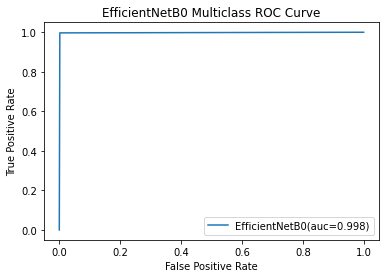

In [ ]:
#macro averaged roc curve 
macro_averaged_fpr_efficientnetb0=(fpr_efficientnetb0[0]+fpr_efficientnetb0[1]+fpr_efficientnetb0[2]+fpr_efficientnetb0[3])/4
macro_averaged_tpr_efficientnetb0=(tpr_efficientnetb0[0]+tpr_efficientnetb0[1]+tpr_efficientnetb0[2]+tpr_efficientnetb0[3])/4
auc_avg_efficientnetb0=auc(macro_averaged_fpr_efficientnetb0,macro_averaged_tpr_efficientnetb0)
plt.plot(macro_averaged_fpr_efficientnetb0,macro_averaged_tpr_efficientnetb0,label='EfficientNetB0(auc=%0.3f)'%auc_avg_efficientnetb0)
plt.title('EfficientNetB0 Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('(15 Epoch)EfficientNetB0 ROC(Micro averaged)',dpi=300); 

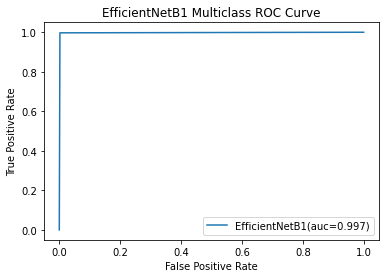

In [ ]:
#macro averaged roc curve 
macro_averaged_fpr_efficientnetb1=(fpr_efficientnetb1[0]+fpr_efficientnetb1[1]+fpr_efficientnetb1[2]+fpr_efficientnetb1[3])/4
macro_averaged_tpr_efficientnetb1=(tpr_efficientnetb1[0]+tpr_efficientnetb1[1]+tpr_efficientnetb1[2]+tpr_efficientnetb1[3])/4
auc_avg_efficientnetb1=auc(macro_averaged_fpr_efficientnetb1,macro_averaged_tpr_efficientnetb1)
plt.plot(macro_averaged_fpr_efficientnetb1,macro_averaged_tpr_efficientnetb1,label='EfficientNetB1(auc=%0.3f)'%auc_avg_efficientnetb1)
plt.title('EfficientNetB1 Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('(15 Epoch)EfficientNetB1 ROC(Micro averaged)',dpi=300); 

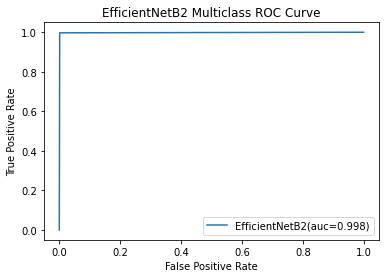

In [ ]:
#macro averaged roc curve 
macro_averaged_fpr_efficientnetb2=(fpr_efficientnetb2[0]+fpr_efficientnetb2[1]+fpr_efficientnetb2[2]+fpr_efficientnetb2[3])/4
macro_averaged_tpr_efficientnetb2=(tpr_efficientnetb2[0]+tpr_efficientnetb2[1]+tpr_efficientnetb2[2]+tpr_efficientnetb2[3])/4
auc_avg_efficientnetb2=auc(macro_averaged_fpr_efficientnetb2,macro_averaged_tpr_efficientnetb2)
plt.plot(macro_averaged_fpr_efficientnetb2,macro_averaged_tpr_efficientnetb2,label='EfficientNetB2(auc=%0.3f)'%auc_avg_efficientnetb2)
plt.title('EfficientNetB2 Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('(15 Epoch)EfficientNetB2 ROC(Micro averaged)',dpi=300); 

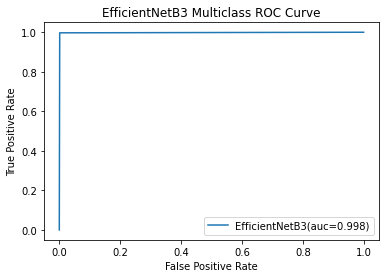

In [ ]:
#macro averaged roc curve 
macro_averaged_fpr_efficientnetb3=(fpr_efficientnetb3[0]+fpr_efficientnetb3[1]+fpr_efficientnetb3[2]+fpr_efficientnetb3[3])/4
macro_averaged_tpr_efficientnetb3=(tpr_efficientnetb3[0]+tpr_efficientnetb3[1]+tpr_efficientnetb3[2]+tpr_efficientnetb3[3])/4
auc_avg_efficientnetb3=auc(macro_averaged_fpr_efficientnetb3,macro_averaged_tpr_efficientnetb3)
plt.plot(macro_averaged_fpr_efficientnetb3,macro_averaged_tpr_efficientnetb3,label='EfficientNetB3(auc=%0.3f)'%auc_avg_efficientnetb3)
plt.title('EfficientNetB3 Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('(15 Epoch)EfficientNetB3 ROC(Micro averaged)',dpi=300); 

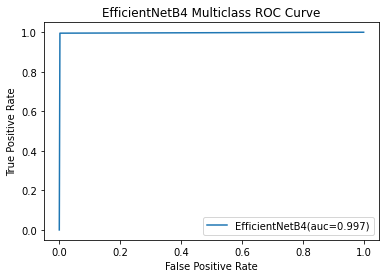

In [ ]:
#macro averaged roc curve 
macro_averaged_fpr_efficientnetb4=(fpr_efficientnetb4[0]+fpr_efficientnetb4[1]+fpr_efficientnetb4[2]+fpr_efficientnetb4[3])/4
macro_averaged_tpr_efficientnetb4=(tpr_efficientnetb4[0]+tpr_efficientnetb4[1]+tpr_efficientnetb4[2]+tpr_efficientnetb4[3])/4
auc_avg_efficientnetb4=auc(macro_averaged_fpr_efficientnetb4,macro_averaged_tpr_efficientnetb4)
plt.plot(macro_averaged_fpr_efficientnetb4,macro_averaged_tpr_efficientnetb4,label='EfficientNetB4(auc=%0.3f)'%auc_avg_efficientnetb4)
plt.title('EfficientNetB4 Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('(15 Epoch)EfficientNetB4 ROC(Micro averaged)',dpi=300); 

In [ ]:
#storing roc data(false positive, true positive) in csv file
df2_efficientnetb0 = pd.DataFrame(columns=['fpr','tpr'])

df2_efficientnetb0['fpr']=[fpr_efficientnetb0[0],fpr_efficientnetb0[1],fpr_efficientnetb0[2],fpr_efficientnetb0[3],macro_averaged_fpr_efficientnetb0]
df2_efficientnetb0['tpr']=[tpr_efficientnetb0[0],tpr_efficientnetb0[1],tpr_efficientnetb0[2],tpr_efficientnetb0[3],macro_averaged_tpr_efficientnetb0]


hist_df = pd.DataFrame(df2_efficientnetb0)
hist_csv_file = '(15 Epoch)efficientnetb0-roc_data.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [ ]:
#storing roc data(false positive, true positive) in csv file
df2_efficientnetb1 = pd.DataFrame(columns=['fpr','tpr'])

df2_efficientnetb1['fpr']=[fpr_efficientnetb1[0],fpr_efficientnetb1[1],fpr_efficientnetb1[2],fpr_efficientnetb1[3],macro_averaged_fpr_efficientnetb1]
df2_efficientnetb1['tpr']=[tpr_efficientnetb1[0],tpr_efficientnetb1[1],tpr_efficientnetb1[2],tpr_efficientnetb1[3],macro_averaged_tpr_efficientnetb1]


hist_df = pd.DataFrame(df2_efficientnetb1)
hist_csv_file = '(15 Epoch)efficientnetb1-roc_data.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [ ]:
#storing roc data(false positive, true positive) in csv file
df2_efficientnetb2 = pd.DataFrame(columns=['fpr','tpr'])

df2_efficientnetb2['fpr']=[fpr_efficientnetb2[0],fpr_efficientnetb2[1],fpr_efficientnetb2[2],fpr_efficientnetb2[3],macro_averaged_fpr_efficientnetb2]
df2_efficientnetb2['tpr']=[tpr_efficientnetb2[0],tpr_efficientnetb2[1],tpr_efficientnetb2[2],tpr_efficientnetb2[3],macro_averaged_tpr_efficientnetb2]


hist_df = pd.DataFrame(df2_efficientnetb2)
hist_csv_file = '(15 Epoch)efficientnetb2-roc_data.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [ ]:
#storing roc data(false positive, true positive) in csv file
df2_efficientnetb3 = pd.DataFrame(columns=['fpr','tpr'])

df2_efficientnetb3['fpr']=[fpr_efficientnetb3[0],fpr_efficientnetb3[1],fpr_efficientnetb3[2],fpr_efficientnetb3[3],macro_averaged_fpr_efficientnetb3]
df2_efficientnetb3['tpr']=[tpr_efficientnetb3[0],tpr_efficientnetb3[1],tpr_efficientnetb3[2],tpr_efficientnetb3[3],macro_averaged_tpr_efficientnetb3]


hist_df = pd.DataFrame(df2_efficientnetb3)
hist_csv_file = '(15 Epoch)efficientnetb3-roc_data.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [ ]:
#storing roc data(false positive, true positive) in csv file
df2_efficientnetb4 = pd.DataFrame(columns=['fpr','tpr'])

df2_efficientnetb4['fpr']=[fpr_efficientnetb4[0],fpr_efficientnetb4[1],fpr_efficientnetb4[2],fpr_efficientnetb4[3],macro_averaged_fpr_efficientnetb4]
df2_efficientnetb4['tpr']=[tpr_efficientnetb4[0],tpr_efficientnetb4[1],tpr_efficientnetb4[2],tpr_efficientnetb4[3],macro_averaged_tpr_efficientnetb4]


hist_df = pd.DataFrame(df2_efficientnetb4)
hist_csv_file = '(15 Epoch)efficientnetb4-roc_data.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

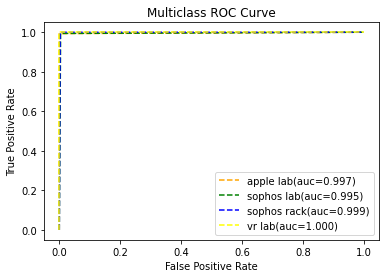

In [ ]:
#ploting roc curve for all 4 classes
plt.plot(fpr_efficientnetb0[0], tpr_efficientnetb0[0], linestyle='--',color='orange', label='apple lab(auc=%0.3f)'%auc1_efficientnetb0)
plt.plot(fpr_efficientnetb0[1], tpr_efficientnetb0[1], linestyle='--',color='green', label='sophos lab(auc=%0.3f)'%auc2_efficientnetb0)
plt.plot(fpr_efficientnetb0[2], tpr_efficientnetb0[2], linestyle='--',color='blue', label='sophos rack(auc=%0.3f)'%auc3_efficientnetb0)
plt.plot(fpr_efficientnetb0[3], tpr_efficientnetb0[3], linestyle='--',color='yellow', label='vr lab(auc=%0.3f)'%auc4_efficientnetb0)
plt.title('Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('(15 Epoch) EfficientNetB0 Multiclass ROC',dpi=300);    

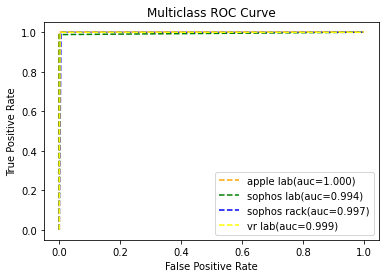

In [ ]:
#ploting roc curve for all 4 classes
plt.plot(fpr_efficientnetb1[0], tpr_efficientnetb1[0], linestyle='--',color='orange', label='apple lab(auc=%0.3f)'%auc1_efficientnetb1)
plt.plot(fpr_efficientnetb1[1], tpr_efficientnetb1[1], linestyle='--',color='green', label='sophos lab(auc=%0.3f)'%auc2_efficientnetb1)
plt.plot(fpr_efficientnetb1[2], tpr_efficientnetb1[2], linestyle='--',color='blue', label='sophos rack(auc=%0.3f)'%auc3_efficientnetb1)
plt.plot(fpr_efficientnetb1[3], tpr_efficientnetb1[3], linestyle='--',color='yellow', label='vr lab(auc=%0.3f)'%auc4_efficientnetb1)
plt.title('Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('(15 Epoch) EfficientNetB1 Multiclass ROC',dpi=300); 

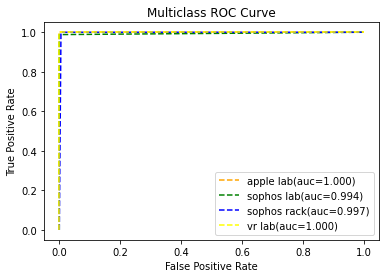

In [ ]:
#ploting roc curve for all 4 classes
plt.plot(fpr_efficientnetb2[0], tpr_efficientnetb2[0], linestyle='--',color='orange', label='apple lab(auc=%0.3f)'%auc1_efficientnetb2)
plt.plot(fpr_efficientnetb2[1], tpr_efficientnetb2[1], linestyle='--',color='green', label='sophos lab(auc=%0.3f)'%auc2_efficientnetb2)
plt.plot(fpr_efficientnetb2[2], tpr_efficientnetb2[2], linestyle='--',color='blue', label='sophos rack(auc=%0.3f)'%auc3_efficientnetb2)
plt.plot(fpr_efficientnetb2[3], tpr_efficientnetb2[3], linestyle='--',color='yellow', label='vr lab(auc=%0.3f)'%auc4_efficientnetb2)
plt.title('Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('(15 Epoch) EfficientNetB2 Multiclass ROC',dpi=300); 

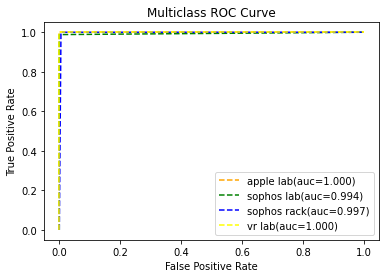

In [ ]:
#ploting roc curve for all 4 classes
plt.plot(fpr_efficientnetb3[0], tpr_efficientnetb3[0], linestyle='--',color='orange', label='apple lab(auc=%0.3f)'%auc1_efficientnetb3)
plt.plot(fpr_efficientnetb3[1], tpr_efficientnetb3[1], linestyle='--',color='green', label='sophos lab(auc=%0.3f)'%auc2_efficientnetb3)
plt.plot(fpr_efficientnetb3[2], tpr_efficientnetb3[2], linestyle='--',color='blue', label='sophos rack(auc=%0.3f)'%auc3_efficientnetb3)
plt.plot(fpr_efficientnetb3[3], tpr_efficientnetb3[3], linestyle='--',color='yellow', label='vr lab(auc=%0.3f)'%auc4_efficientnetb3)
plt.title('Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('(15 Epoch) EfficientNetB3 Multiclass ROC',dpi=300); 

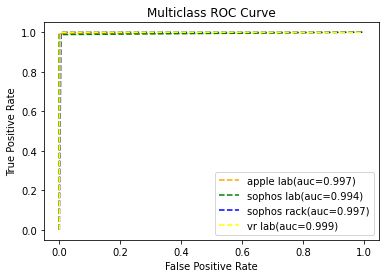

In [ ]:
#ploting roc curve for all 4 classes
plt.plot(fpr_efficientnetb4[0], tpr_efficientnetb4[0], linestyle='--',color='orange', label='apple lab(auc=%0.3f)'%auc1_efficientnetb4)
plt.plot(fpr_efficientnetb4[1], tpr_efficientnetb4[1], linestyle='--',color='green', label='sophos lab(auc=%0.3f)'%auc2_efficientnetb4)
plt.plot(fpr_efficientnetb4[2], tpr_efficientnetb4[2], linestyle='--',color='blue', label='sophos rack(auc=%0.3f)'%auc3_efficientnetb4)
plt.plot(fpr_efficientnetb4[3], tpr_efficientnetb4[3], linestyle='--',color='yellow', label='vr lab(auc=%0.3f)'%auc4_efficientnetb4)
plt.title('Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('(15 Epoch) EfficientNetB4 Multiclass ROC',dpi=300); 